# **Heart Stroke Prediction**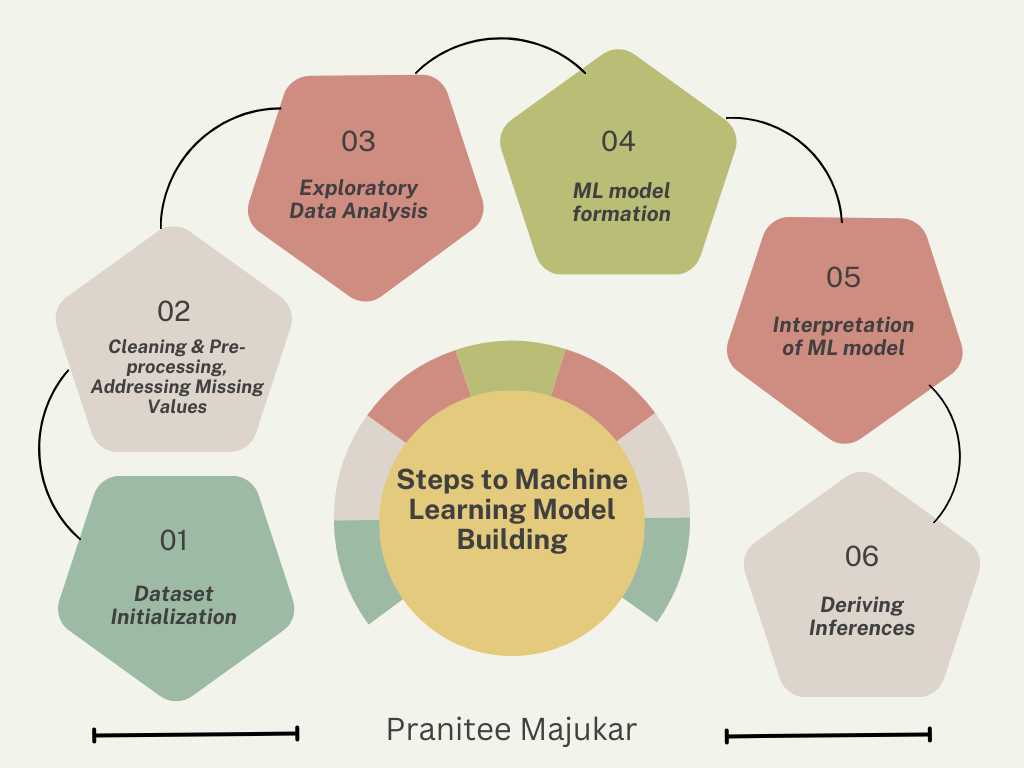

Kaggle Dataset Link - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

## ABSTRACT

This assignment explores the application of machine learning techniques to predict the occurrence of strokes in individuals, utilizing the Heart Stroke Prediction dataset. The workflow encompasses data preprocessing, feature selection, model fitting, and performance evaluation. Preprocessing steps include handling missing values, label encoding categorical features, and conducting exploratory data analysis (EDA). Feature selection techniques such as Ordinary Least Squares (OLS) regression and Random Forest Classification are employed to identify relevant predictors. Subsequently, logistic regression, XGBoost, and AutoML, including Gradient Boosting Machines (GBM), are utilized to construct predictive models. Model performance is evaluated using metrics such as accuracy, with interpretability techniques like SHAP analysis aiding in understanding model predictions. Additionally, experiments with outlier removal and regularization are conducted to enhance model accuracy. Through these processes, valuable insights are gained into building and evaluating machine learning models for binary classification tasks such as heart stroke prediction.

Stroke Prediction -
Stroke is a severe medical condition caused by a disruption in blood supply to the brain, resulting from either a blockage or the rupture of a blood vessel. Prompt medical attention is crucial in such cases. Numerous factors contribute to an increased risk of stroke, making it essential to explore the relationships between these factors and the occurrence of stroke. Analyzing a dataset containing information such as age, gender, hypertension, heart disease, average glucose level, smoking status, and BMI enables the training of machine learning models. These models can identify patterns and make predictions about an individual's likelihood of experiencing a stroke. Integrating such predictive models into healthcare systems allows medical professionals to proactively identify individuals at higher risk of stroke, enabling preventive measures and better management of the condition. This approach has the potential to save lives and enhance patient outcomes.

Goal here is to classify whether a person has a stroke or not. That is, it is a classification problem.

The information about dataset:

- id: unique identifier

- gender: "Male", "Female" or "Other"

- age: age of the patient

- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

- ever_married: "No" or "Yes"

- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

- Residence_type: "Rural" or "Urban"

- avg_glucose_level: average glucose level in blood

- bmi: body mass index

- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

- stroke: 1 if the patient had a stroke or 0 if not

Models used -
- Logistic Regression
- XGBoost
- AutoML

AutoML -


AutoML, or Automated Machine Learning, is the process of automating the end-to-end process of applying machine learning to real-world problems. Its benefits include:

- Accessibility: Makes machine learning more accessible to individuals and organizations, even those without extensive expertise in data science.
- Efficiency: Automates repetitive and time-consuming tasks involved in model development, speeding up the process of building high-quality models.
- Scalability: Enables the handling of large datasets and complex problems more efficiently, allowing for faster iteration and experimentation.
- Consistency: Reduces the risk of human error and ensures consistency in model development and deployment across different projects and teams.
- Cost-effectiveness: Saves time and resources by automating tasks that would otherwise require significant manual effort or expertise.

SHAP Analysis -

SHAP (SHapley Additive exPlanations) analysis is a method used to explain the output of machine learning models. It provides insights into how the input features contribute to the model's predictions.

SHAP values provide a clear interpretation of feature importance by quantifying the impact of each feature on the model's output. This helps to understand which features are driving the model's predictions and how they influence them.

## Installing Libraries

In [70]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install shap

## Importing Libraries

In [71]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import time
import psutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import shap

## Reading the data

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/pranitee23/Data-Science-Methods-and-Tools/main/healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [73]:
# checking null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [74]:
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(exclude=['object']).columns

print("Categorical: ",categorical_columns)
print("Categorical Column Count:", len(categorical_columns))

print("\nNumeric",numeric_columns)
print("Numeric Column Count:", len(numeric_columns))

Categorical:  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
Categorical Column Count: 5

Numeric Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Numeric Column Count: 7


- This dataset has 5 categorical columns and 7 numerical columns.
- Here, the target variable is "stroke" and all other are the independent variables. Therefore, "bmi" is one of the independent variables that has 201 null values.

In [75]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

- In the age column, the range is 0.08 to 82 and the mean age being 43.22. Here the min age can be a data entry issue or can be related to infants. The range of all the other variables make sense.
- For example -
- Gender ranges from 0 to 2, that is male, female, and other
Ever Married ranges from 0 to 1, that is yes or no. Same goes with hypertension, heart disease, and stroke.
- Smoking Status ranges from 0 to 3. These include formerly smoked, never smoked, smokes and unknown.
- Residence type ranges from 0 to 1 that is rural  or urban.
Work Type ranges from 0 to 4. These include Private, self employed, Govt job, Children, and never worked.

In [76]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


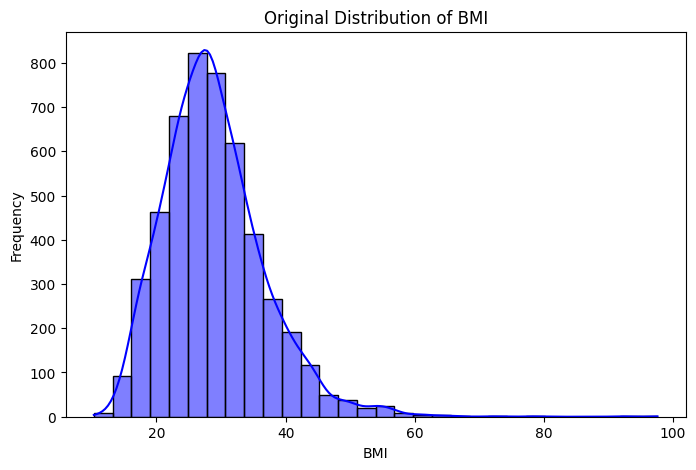

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], kde=True, bins=30, color='blue')
# taking the bmi column since it has null values to see its destributions
plt.title('Original Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

BMI column has 201 null values. The graph above tells that the bmi has right-skewed distribution. Therefore using median to impute the missing values later.

## Preprocessing - Dropping ID and imputing null values from bmi with median

In [79]:
# dropping the id column
df.drop('id' , axis = 1 , inplace = True)

#filling the null values by median
df.bmi.fillna(df.bmi.median(),inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Exploratory Data Analysis

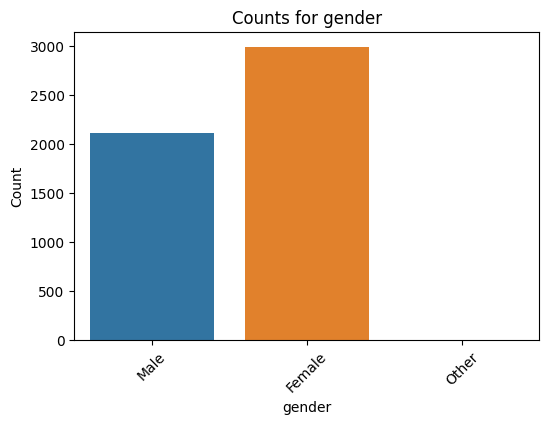

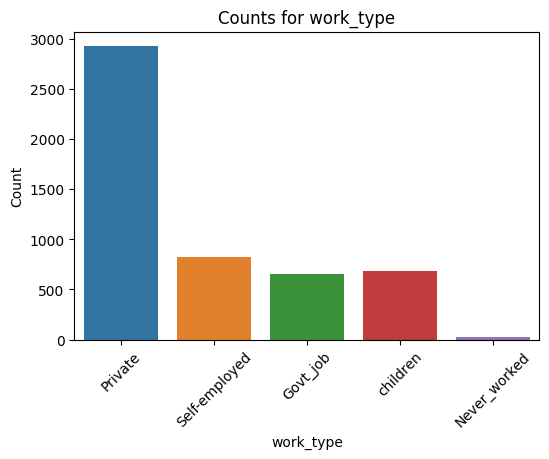

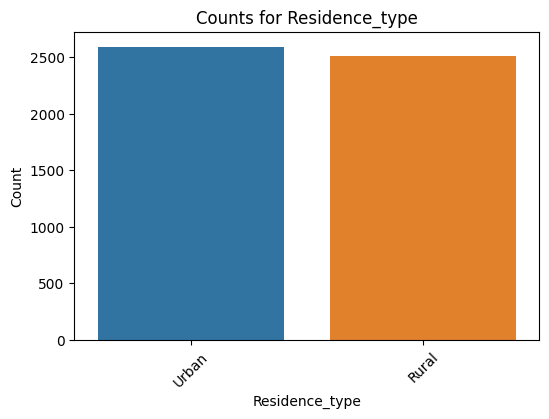

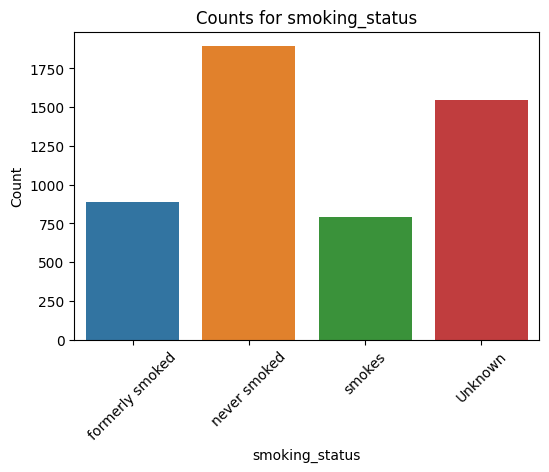

In [80]:
# List of categorical columns
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']

# Loop through each categorical column
for column in categorical_columns:
    # Create a new figure for each column
    plt.figure(figsize=(6, 4))

    # Plot the count for the current column
    sns.countplot(x=df[column], hue= df[column])

    # Set labels and title
    plt.title(f"Counts for {column}")
    plt.ylabel("Count")
    plt.xlabel(column)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

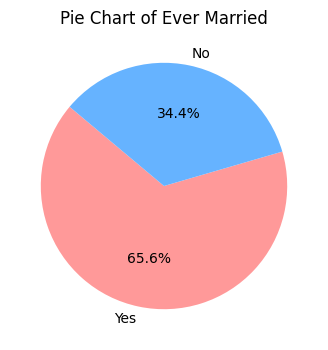

In [81]:
# Get the counts of 'ever_married'
ever_married_counts = df['ever_married'].value_counts()

# Define custom colors
custom_colors = ['#ff9999', '#66b3ff']

# Plot the pie chart with custom colors
plt.figure(figsize=(6, 4))
plt.pie(ever_married_counts, labels=ever_married_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Pie Chart of Ever Married')
plt.show()

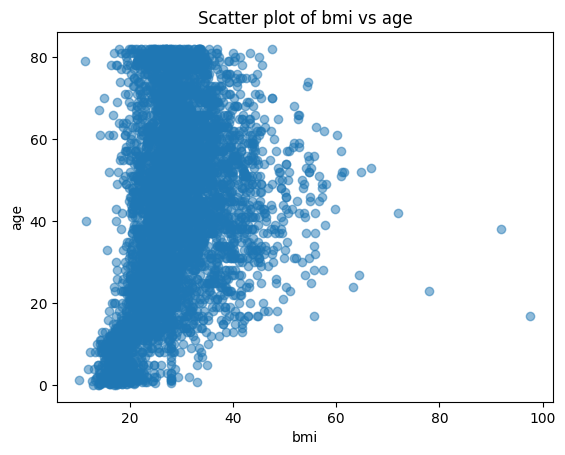

In [82]:
plt.scatter(df['bmi'], df['age'], alpha=0.5)
plt.title('Scatter plot of bmi vs age')
plt.xlabel('bmi')
plt.ylabel('age')
plt.show()

- Density of Data Points: There's a high density of points along the lower BMI values, which suggests that a large number of individuals in the dataset have BMI values in the lower range.

- Age Distribution: The ages are fairly uniformly distributed across the BMI range, with  a slight concentration of younger individuals at lower BMI values.

- Outliers: There appear to be some outliers, especially in terms of BMI, with a few points having significantly higher BMI values compared to the rest of the data.

- Potential Relationship: The plot doesn't suggest a clear or strong relationship between age and BMI; the points are quite spread out across ages for any given BMI. This could indicate that within this dataset, BMI does not change significantly with age, or that any relationship is not linear and might require more complex modeling to understand.

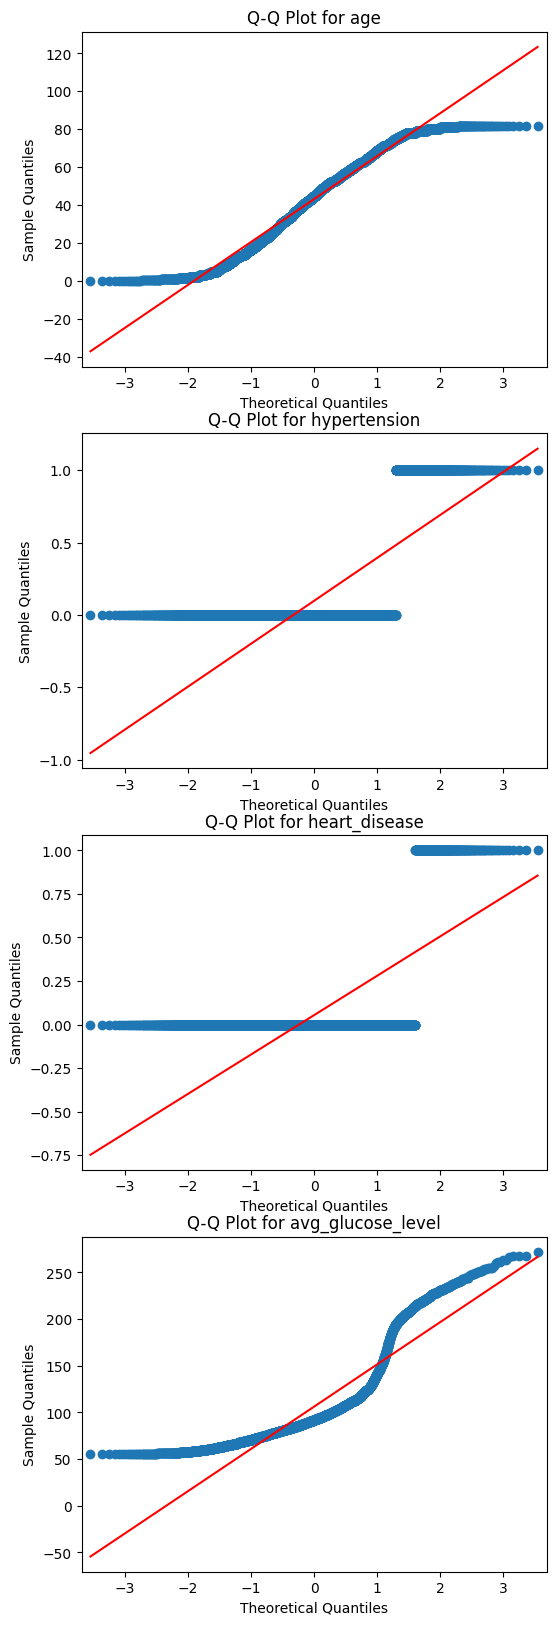

In [83]:
numeric_columns_list = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level'] # creating a list

fig, axes = plt.subplots(nrows=len(numeric_columns_list), figsize=(6, 5 * len(numeric_columns_list)))

# Plot Q-Q plots for each numeric variable
for i, variable in enumerate(numeric_columns_list):
    sm.qqplot(df[variable], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot for {variable}')

plt.show()

qq plot is drawn for all the numeric columns:
- For age column, some of the datapoints align with the theoretical values. All the values in age are continuous in nature
- For hypertension, heart disease, and stroke, values are binomial. It is either yes/no or 1/0.
- For bmi column there are values in the middle quartile which obey the theoritical values, and other values deviate from the standard line. This shows that there are more extreme values (both low and high) than what would be expected in a normal distribution
- For avg_glucose_level there are values which deviate from the straight line, showing that there are extreme values than what would be expected in a normal distribution.

## Label Encoding

In [84]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

'''
Gender - Female(0), Male(1)
work_type - Private(2), self_employed(3), children(4), Govt_job(0), never_worked(1)
Residence_type - Urban(1), Rural(0)
smoking_status - never smoked(2), unknown(0), formerly smoked(1), smokes(3)
ever_married - Yes(1), No(0)
'''

'\nGender - Female(0), Male(1)\nwork_type - Private(2), self_employed(3), children(4), Govt_job(0), never_worked(1)\nResidence_type - Urban(1), Rural(0)\nsmoking_status - never smoked(2), unknown(0), formerly smoked(1), smokes(3)\never_married - Yes(1), No(0)\n'

## Histograms

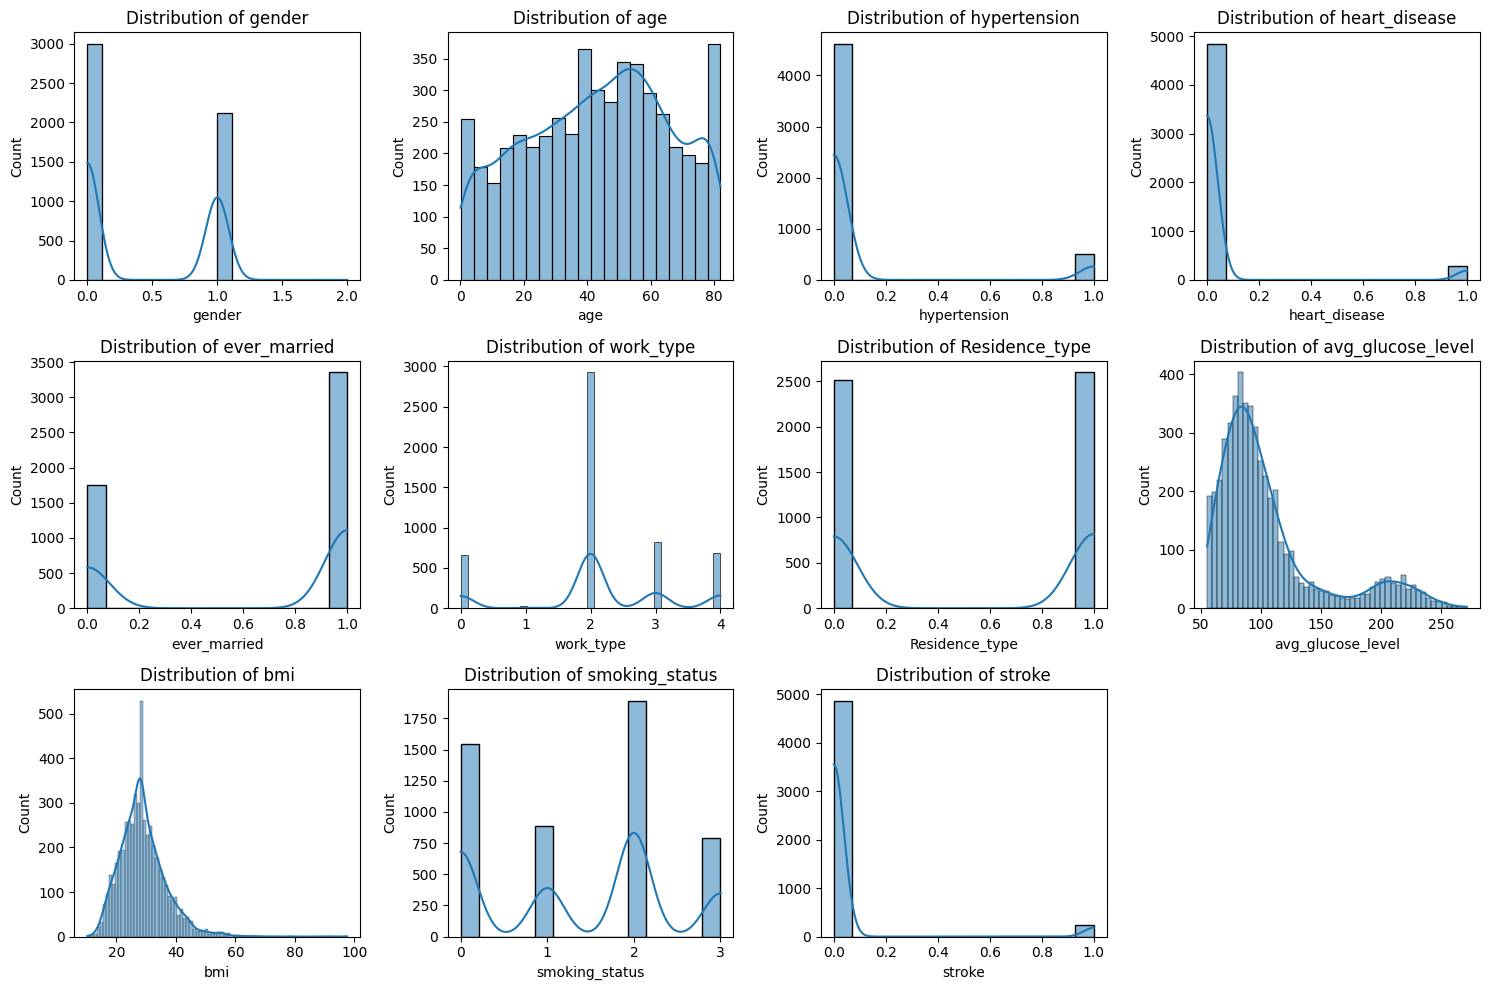

In [85]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

- Distribution of Gender:
This histogram shows the frequency of each gender category in the dataset. The x-axis represents gender categories, which are probably encoded as numerical values, and the y-axis represents the count of observations in each category.

- Distribution of Age:
This plot shows the age distribution of individuals in the dataset. The x-axis is the age in years, and the y-axis is the count of individuals. It looks like a unimodal distribution, with the majority of individuals in the middle age range.

- Distribution of Average Glucose Level:
The last plot shows the distribution of average glucose levels among individuals. The x-axis is the average glucose level, and the y-axis is the count of individuals. It appears to have a right-skewed distribution, with most individuals having glucose levels in the lower range and fewer individuals having very high glucose levels.

- Distribution of Heart Disease:
Similar to the hypertension histogram, this one shows the count of individuals with and without heart disease, which is another binary feature.

- Distribution of Ever Married:
This histogram shows the marital status of individuals, with categories likely encoded as 0 for 'No' and 1 for 'Yes', indicating whether individuals have ever been married.

## Heatmaps to show the correlation between the dependent and independent variable

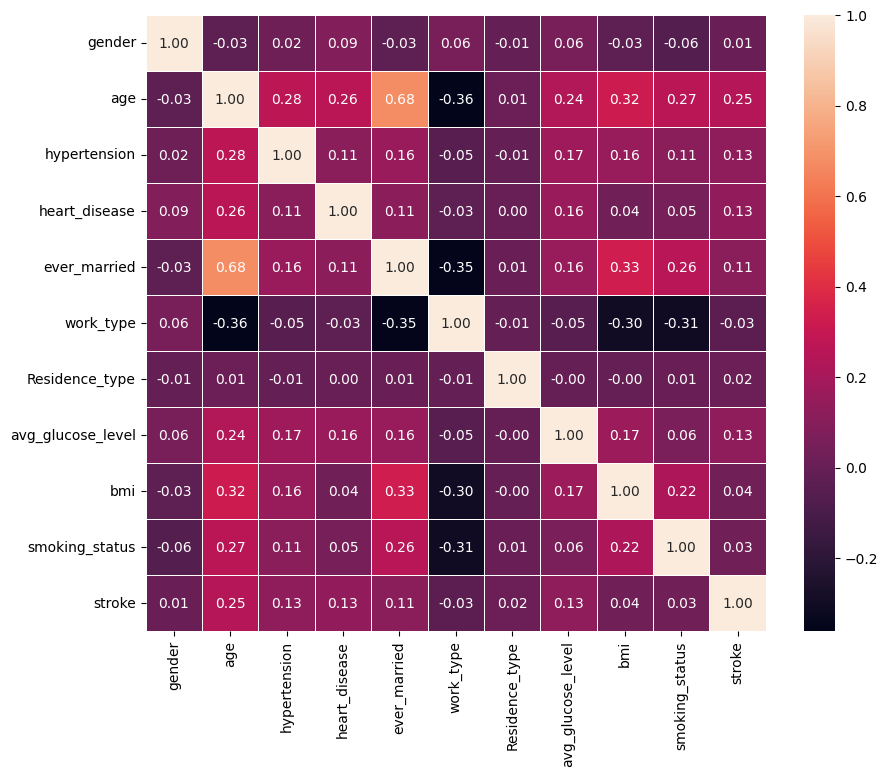

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.2f')
plt.show()

From the predictor variables, according to the heatmap, age and ever_married have a positive correlation of 0.68 value.

## Feature Importance using Random Forest Classifier

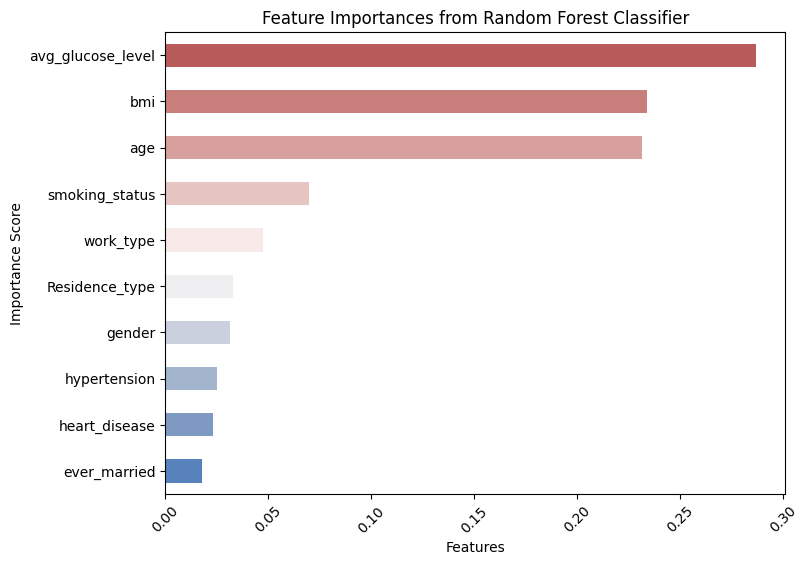

In [87]:
X2 = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
          'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y2 = df['stroke']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X2, y2)

# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X2.columns).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
colors = sns.color_palette("vlag", len(feature_importances))
feature_importances.plot(kind='barh', color=colors)
plt.title('Feature Importances from Random Forest Classifier')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

According to Random Forest Classifier, avg_glucose_level is the most important feature, followed by bmi and then age. The least important feature is ever_married.

### OLS Regression Method

In [88]:
model = sm.OLS(df['stroke'], df[['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status',
                                   'age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi']]).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 stroke   R-squared (uncentered):                   0.124
Model:                            OLS   Adj. R-squared (uncentered):              0.122
Method:                 Least Squares   F-statistic:                              71.91
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                   3.41e-138
Time:                        02:06:41   Log-Likelihood:                          806.20
No. Observations:                5110   AIC:                                     -1592.
Df Residuals:                    5100   BIC:                                     -1527.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender               -0.0029      0.006     -0.491      0.624      -0.014       0.009
ever_married         -0.0361      0.009     -4.230      0.000      -0.053      -0.019
work_type            -0.0010      0.002     -0.436      0.663      -0.006       0.004
Residence_type        0.0017      0.006      0.302      0.763      -0.009       0.013
smoking_status       -0.0066      0.003     -2.305      0.021      -0.012      -0.001
age                   0.0025      0.000     13.618      0.000       0.002       0.003
hypertension          0.0461      0.010      4.540      0.000       0.026       0.066
heart_disease         0.0579      0.013      4.313      0.000       0.032       0.084
avg_glucose_level     0.0003   6.49e-05      3.931      0.000       0.000       0.000
bmi                  -0.0020      0.000     -6.237      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     3861.503   Durbin-Watson:                   0.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49740.001
Skew:                           3.715   Prob(JB):                         0.00
Kurtosis:                      16.357   Cond. No.                         587.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to OLS regression method - Ever Married, smoking status, age, hypertension, heart disease, avg glucose level, and bmi are important factors

## Normalization

In [89]:
# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the two columns with outliers and transform them
normalized_columns = scaler.fit_transform(df[['bmi', 'avg_glucose_level']])

# Update the original DataFrame with the normalized values
df[['bmi', 'avg_glucose_level']] = normalized_columns

Normalization is a data preprocessing technique used to scale numerical features of a dataset to a standard range. It ensures that all features contribute equally to the analysis and prevents features with larger magnitudes from dominating the model.


RobustScaler is a type of feature scaling method that scales the features based on their interquartile range (IQR). It is robust to outliers because it uses the median and the IQR rather than the mean and standard deviation.

## Handling Outliers

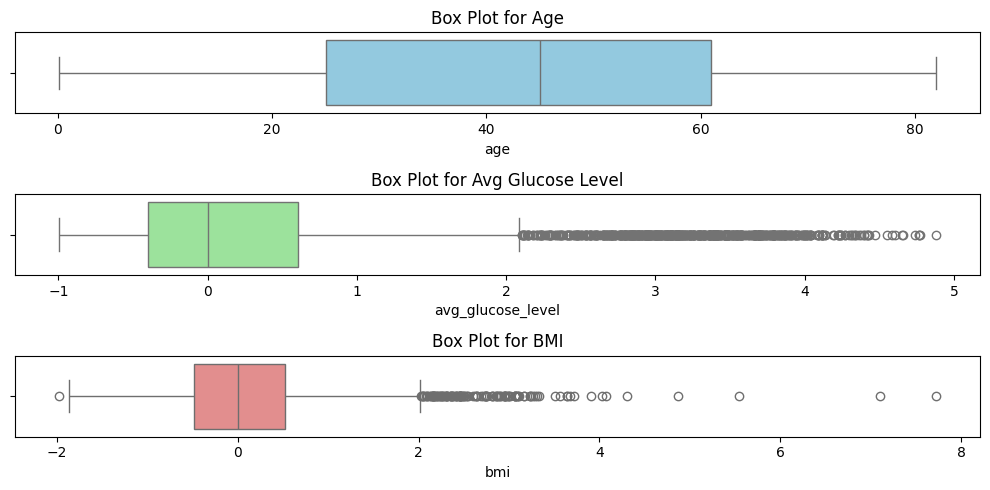

In [90]:
# Box plot
plt.figure(figsize=(10, 5))

# Box plot for 'age'
plt.subplot(3, 1, 1)
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Box Plot for Age')

# Box plot for 'avg_glucose_level'
plt.subplot(3, 1, 2)
sns.boxplot(x=df['avg_glucose_level'], color='lightgreen')
plt.title('Box Plot for Avg Glucose Level')

# Box plot for 'bmi'
plt.subplot(3, 1, 3)
sns.boxplot(x=df['bmi'], color='lightcoral')
plt.title('Box Plot for BMI')

# Adjust layout
plt.tight_layout()
plt.show()

In [91]:
# Identifying outliers using IQR method for 'avg_glucose_level'
Q1_glucose = df['avg_glucose_level'].quantile(0.25)
Q3_glucose = df['avg_glucose_level'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose
lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose

# Finding outliers in 'avg_glucose_level'
outliers_glucose = df[(df['avg_glucose_level'] < lower_bound_glucose) | (df['avg_glucose_level'] > upper_bound_glucose)]

# Removing 'bmi' outliers
stroke_data_no_outliers_glucose = df.drop(outliers_glucose.index)

# Store the lower bound, upper bound, and number of outliers removed for 'avg_glucose_level'
threshold_comparison_glucose = pd.DataFrame({
    'Column': ['avg_glucose_level'],
    'Lower Bound': [lower_bound_glucose],
    'Upper Bound': [upper_bound_glucose],
    'Outliers Removed': [len(outliers_glucose)]
})
print(threshold_comparison_glucose)

              Column  Lower Bound  Upper Bound  Outliers Removed
0  avg_glucose_level     -1.89734      2.10266               627


In [92]:
X_outlier_glucose = stroke_data_no_outliers_glucose.drop('stroke', axis=1)
y_outlier_glucose = stroke_data_no_outliers_glucose['stroke']

### Train Test Split

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_outlier_glucose, y_outlier_glucose, test_size=0.3, random_state=42,shuffle=True)

In [94]:
X_train.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
3546       0   7.0             0              0             0          4   
4791       0  64.0             0              0             1          2   
260        1  79.0             0              1             1          2   
4299       0  66.0             0              0             1          3   
448        1  65.0             0              0             1          2   

      Residence_type  avg_glucose_level       bmi  smoking_status  
3546               1           0.171936  0.655556               0  
4791               1          -0.712580  0.600000               3  
260                1          -0.944633 -0.677778               1  
4299               0          -0.162437  0.722222               2  
448                1           1.445651  0.088889               0

## Logistic Regression Model

In [95]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

Logistic Regression Accuracy: 0.9621


### Interpreting Regression Coefficients

In [96]:
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': logreg_model.coef_[0]})
print(coefficients)

            Variable  Coefficient
0             gender     0.265265
1                age     0.077148
2       hypertension     0.339448
3      heart_disease    -0.060350
4       ever_married    -0.446570
5          work_type    -0.075780
6     Residence_type     0.070930
7  avg_glucose_level     0.007700
8                bmi    -0.215668
9     smoking_status    -0.123885


- Gender: The coefficient for gender is positive (0.268469), indicating that males (encoded as 1) have a higher log-odds of having a stroke compared to females (encoded as 0), holding other variables constant.

- Age: The positive coefficient (0.077120) for age suggests that as age increases, the log-odds of having a stroke increase, which is consistent with medical knowledge that stroke risk typically increases with age.

- Ever Married: The negative coefficient (-0.446171) for being ever married (encoded as 1) suggests that married individuals have lower log-odds of having a stroke compared to those who have never been married (encoded as 0). This might reflect the possible health benefits of marriage, such as social support.

- Work Type: The negative coefficient for work type (-0.076684) suggests that with an increase in the encoded value for work type, the log-odds of having a stroke decrease. Given your encoding, individuals who have 'never worked' (encoded as 1) have a lower risk compared to those with 'private' jobs (encoded as 2), and so on.

- Smoking Status: The negative coefficient (-0.122931) implies that as the encoded value for smoking status increases, the log-odds of having a stroke decrease. With your encoding, 'smokes' (encoded as 3) would be associated with a lower log-odds compared to 'formerly smoked' (encoded as 1), which might suggest that current smokers have a lower risk than former smokers, but such a conclusion could be misleading without further context and understanding of the data.

- BMI: The negative coefficient (-0.024623) for BMI suggests that a higher BMI is associated with lower log-odds of having a stroke, which is contrary to common health perspectives where high BMI is a risk factor for stroke.

- Residence Type: The coefficient (0.070040) for residence type is positive, which indicates that individuals living in urban areas (encoded as 1) have higher log-odds of having a stroke compared to those living in rural areas (encoded as 0)

### Confusion Matrix - Logistic Regression

In [97]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Classification Report - Logistice Regression

In [98]:
# Classification Report Logistic Regression
classification_rep_logreg = classification_report(y_test, y_pred_logreg, zero_division=1)

# Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_rep_logreg)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1294
           1       1.00      0.00      0.00        51

    accuracy                           0.96      1345
   macro avg       0.98      0.50      0.49      1345
weighted avg       0.96      0.96      0.94      1345



## SHAP Analysis on Logistic Regression Model

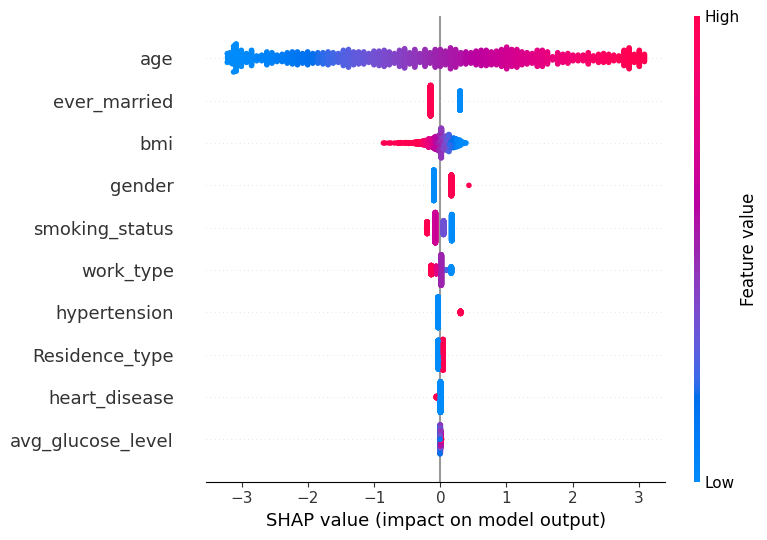

In [99]:
explainer = shap.LinearExplainer(logreg_model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

- Age is the most impactful feature, with higher values pushing predictions towards higher likelihoods of stroke.
- Being ever married (presumably being married is the high feature value indicated by red) seems to lower the likelihood of stroke, which is represented by the points mainly being on the left (blue).
- Higher BMI values (in red) seem to have a mix of positive and negative impacts on the stroke prediction, with a spread across both sides of zero.
- Gender (with male as 1) has a noticeable impact, with being male (in red) contributing to a higher prediction of stroke.
- Smoking status, work type, hypertension, residence type, heart disease, and average glucose level also contribute to the model's output, but their impact is less pronounced compared to age, marital status, and BMI.

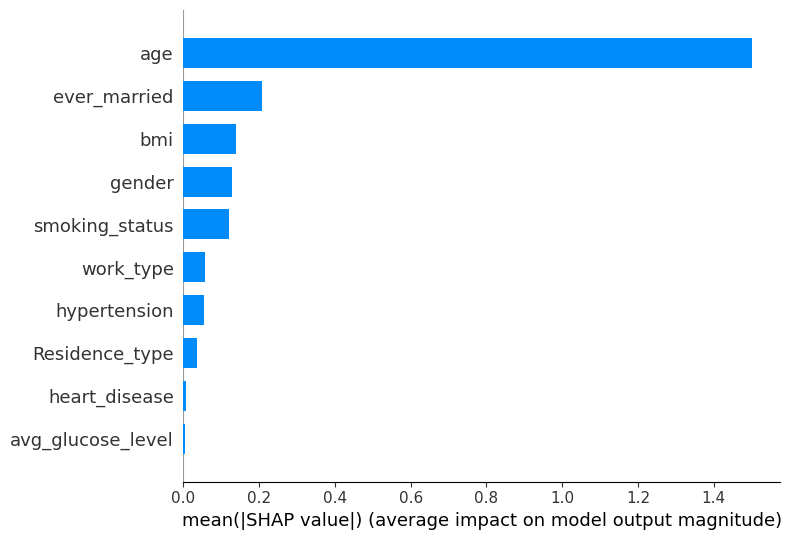

In [100]:
explainer = shap.Explainer(logreg_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

- Age has the largest average impact on the model's output, which means that changes in age are, on average, the most influential in affecting the model's predictions.
- The features following age in descending order of impact are ever married, BMI, gender, smoking status, work type, hypertension, and residence type.
- Heart disease and average glucose level have the least average impact on the model's output.

In [101]:
explainer = shap.Explainer(logreg_model, X_train)
sample_ind = 20
# Calculate SHAP values for a single instance
shap_values = explainer(X_train.iloc[[sample_ind]])

# Generate the SHAP waterfall plot for the selected instance
shap.plots.waterfall(shap_values[0], max_display=14)

Each bar represents the impact of an individual feature on the model's prediction for this particular instance, relative to the base value.
Red bars represent features that push the prediction higher (increase the probability of the positive class), while blue bars push the prediction lower (decrease the probability of the positive class).

- The feature "age" appears to have a large negative impact on the model's prediction, strongly decreasing the likelihood of the positive class.
- Features like "ever_married" and "work_type" have negative contributions as well, further reducing the prediction value.
- "smoking_status" and "Residence_type" have a small positive impact, increasing the prediction value slightly.
- Many features have a contribution of zero or a negligible impact in this particular instance, as indicated by short bars or a lack of bars for those features.

## XGBOOST Model(Tree Based)

In [102]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.1, n_estimators=100, seed=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


<Figure size 2000x1500 with 0 Axes>

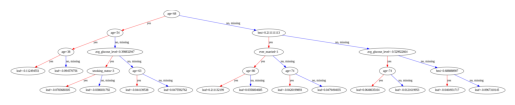

In [135]:
from xgboost import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(xgb_model, num_trees=1)

# plot to a file with higher resolution
plt.savefig('xgboost_tree1.png', dpi=300)
plt.show()

This image visualizes the first decision tree from an XGBoost ensemble model. Each node in the tree represents a decision rule based on features in the dataset. The tree is recursively partitioned into smaller subsets, with each split based on the feature that maximizes the reduction in a certain criterion, typically the Gini impurity or information gain. The final leaves of the tree contain the predicted outcomes or class labels. By interpreting the tree structure and the conditions at each node, we can gain insights into how the model makes predictions and which features are most important for classification.

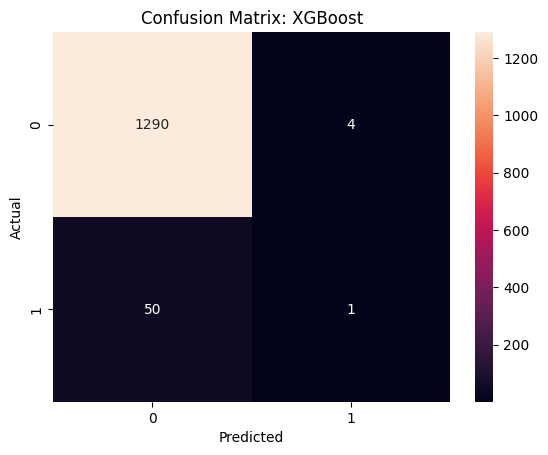

In [103]:
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, fmt="d")
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Classification Report

In [104]:
# Classification Report Logistic Regression
classification_rep_xgb = classification_report(y_test, y_pred, zero_division=1)

# Print the classification report
print("Classification Report for XGBoost:")
print(classification_rep_xgb)

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1294
           1       0.20      0.02      0.04        51

    accuracy                           0.96      1345
   macro avg       0.58      0.51      0.51      1345
weighted avg       0.93      0.96      0.94      1345



### SHAP Analysis on XGBoost

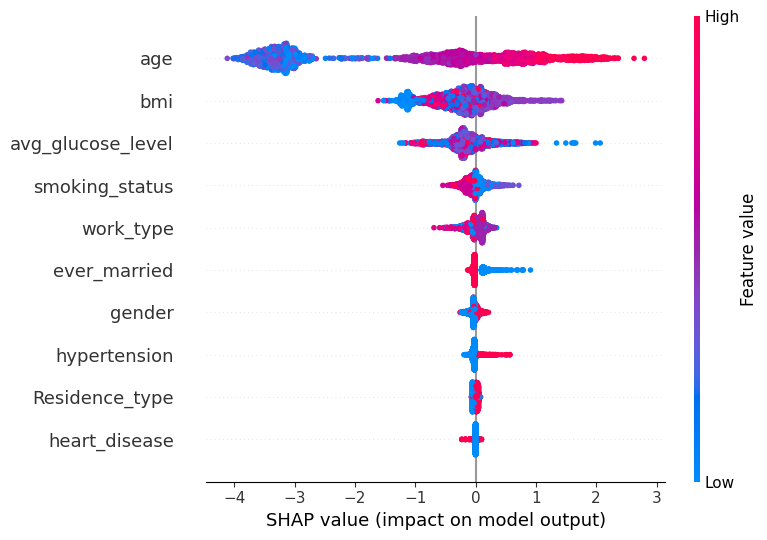

In [105]:
explainer = shap.Explainer(xgb_model)
# Calculate SHAP values for the training set
shap_values = explainer(X_train)
# Summary plot
shap.summary_plot(shap_values, X_train)

In the above plot, "age" seems to have the highest importance since it's at the top. Features like "bmi" and "avg_glucose_level" also show a significant impact on the model's predictions. The color coding suggests which values of the feature (low or high) have more impact.

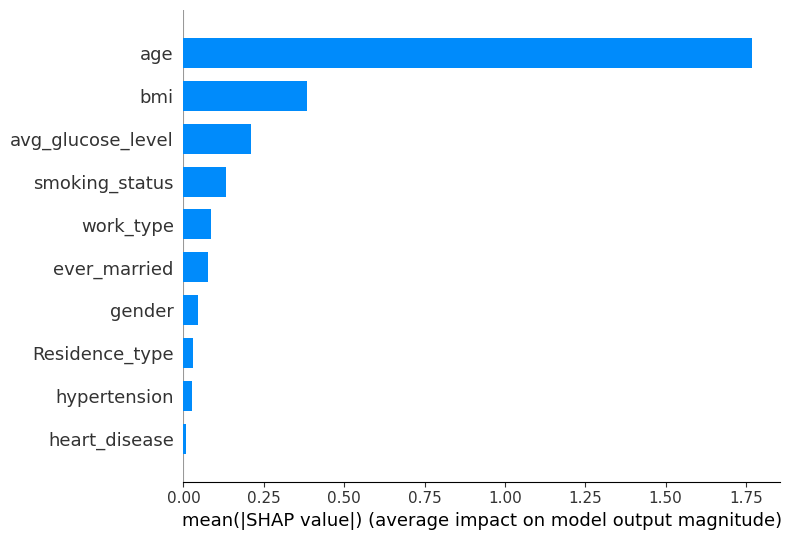

In [106]:
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

- The x-axis represents the mean absolute SHAP value, which quantifies the average impact of a feature on the model's output magnitude. The higher the value, the more significant the feature's impact on the model prediction.
- The y-axis lists the features in descending order of importance. The most influential feature is at the top.
- 'age' appears to have the most significant average impact on model predictions, followed by 'bmi' and 'avg_glucose_level'.

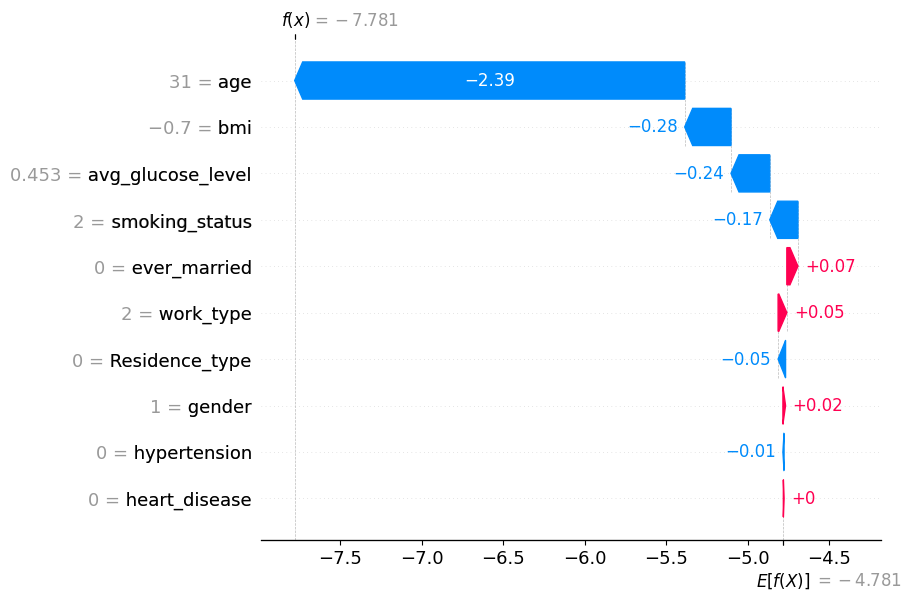

In [107]:
# Create the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for a single instance
shap_values = explainer(X_train.iloc[[sample_ind]])

# Generate the SHAP waterfall plot for the selected instance
shap.plots.waterfall(shap_values[0], max_display=14)

- Each colored bar represents a feature's contribution towards the final prediction. Red bars indicate features that pushed the model's output higher (towards the positive class), and blue bars indicate features that pushed the output lower (towards the negative class).
- The features are listed from top to bottom by their impact on the particular prediction being explained.
- 'age' has the most significant positive contribution, while 'avg_glucose_level' has a negative contribution.

## AutoML

In [108]:
# configure the memory allocation and the maximum runtime for the AutoML process

min_mem_size = 6
run_time = 222

In [109]:
# related to memory size for execution

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

4


In [110]:
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:35430..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr358ne48
  JVM stdout: /tmp/tmpr358ne48/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr358ne48/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:35430
Connecting to H2O server at http://127.0.0.1:35430 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         09 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_jo20w6
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:35430
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [111]:
df_h2o = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [112]:
df_h2o.describe()

Rows:5110
Cols:11

gender              age                hypertension        heart_disease        ever_married        work_type           Residence_type      avg_glucose_level    bmi                   smoking_status      stroke
-------  ------------------  -----------------  ------------------  -------------------  ------------------  ------------------  ------------------  -------------------  --------------------  ------------------  ------------------
type     int                 real               int                 int                  int                 int                 int                 real                 real                  int                 int
mins     0.0                 0.08               0.0                 0.0                  0.0                 0.0                 0.0                 -0.997828742027412   -1.9777777777777787   0.0                 0.0
mean     0.4142857142857141  43.226614481409    0.0974559686888454  0.05401174168297456  0.6561643835616439  2.1677103718199504  0.5080234833659492  0.3870993921486831   0.08467058056099146   1.3769080234833617  0.0487279843444227
maxs     2.0                 82.0               1.0                 1.0                  1.0                 4.0                 1.0                 4.881395033247388    7.722222222222225     3.0                 1.0
sigma    0.4930436314174791  22.61264672311348  0.2966066742337912  0.22606298750336545  0.475033520037369   1.090293498184979   0.4999845441302678  1.2290286375514186   0.855506924309723     1.0715337628679502  0.2153198569802376
zeros    2994                0                  4612                4834                 1757                657                 2514                0                    230                   1544                4861
missing  0                   0                  0                   0                    0                   0                   0                   0                    0                     0                   0
0        1.0                 67.0               0.0                 1.0                  1.0                 2.0                 1.0                 3.7129868367485415   0.9444444444444448    1.0                 1.0
1        0.0                 61.0               0.0                 0.0                  1.0                 3.0                 0.0                 2.9943004478219573   0.0                   2.0                 1.0
2        1.0                 80.0               0.0                 1.0                  1.0                 2.0                 0.0                 0.3809200705658844   0.488888888888889     2.0                 1.0
3        0.0                 49.0               0.0                 0.0                  1.0                 2.0                 1.0                 2.153480797937305    0.7                   3.0                 1.0
4        0.0                 79.0               1.0                 0.0                  1.0                 3.0                 0.0                 2.231917492197042    -0.4555555555555559   2.0                 1.0
5        1.0                 81.0               0.0                 0.0                  1.0                 2.0                 1.0                 2.5600488533043837   0.09999999999999988   1.0                 1.0
6        1.0                 74.0               1.0                 1.0                  1.0                 2.0                 0.0                 -0.591532093906907   -0.07777777777777813  2.0                 1.0
7        0.0                 69.0               0.0                 0.0                  0.0                 2.0                 1.0                 0.06798751526665789  -0.5888888888888892   2.0                 1.0
8        0.0                 59.0               0.0                 0.0                  1.0                 2.0                 0.0                 -0.4270593024833759  0.0                   0.0                 1.0
9        0.0                 78.0               0.0                 0.0   

In [113]:
num_rows, num_columns = df_h2o.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 5110
Number of columns: 11


### Train test split - h2o

In [114]:
pct_rows = 0.80
df_train, df_test = df_h2o.split_frame([pct_rows])

In [115]:
print(df_train.shape)
print(df_test.shape)

(4065, 11)
(1045, 11)


In [116]:
X=df_h2o.columns
print(X)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [117]:
#Seperate Dependent variable from Independent variable
y_target ='stroke'
X.remove(y_target)
print('Features except target variable: ',X)
print('Target Variable: ',y_target)

Features except target variable:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
Target Variable:  stroke


In [118]:
#set the AutoML
aml = H2OAutoML(max_runtime_secs=run_time, sort_metric='MAE',max_models=10 ,seed=1, exclude_algos=['DeepLearning'])

#pass the data through H20AutoML
aml.train(x=X,y=y_target,training_frame=df_train)

AutoML progress: |
02:07:28.196: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████
02:07:42.748: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
02:07:44.590: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
02:07:51.589: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
02:07:57.131: _response param, We ha

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20240403_20727


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    21                 21                          16674                  7            7            7             44            79            58.4762

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.032042816994376264
RMSE: 0.17900507533133317
MAE: 0.07415201049316664
RMSLE: 0.12161820797236848
Mean Residual Deviance: 0.032042816994376264

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.04444820779638162
RMSE: 0.2108274360617745
MAE: 0.08707925545004798
RMSLE: 0.148091916133227
Mean Residual Deviance: 0.04444820779638162

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0           nan           nan           nan           nan           nan
loglikelihood           nan        0           nan           nan           nan           nan           nan
mae                     0.0873735  0.0036701   0.0938258     0.0859732     0.0866963     0.0855451     0.0848272
mean_residual_deviance  0.0453046  0.00239948  0.0492446     0.0456372     0.044814      0.0433795     0.0434475
mse                     0.0453046  0.00239948  0.0492446     0.0456372     0.044814      0.0433795     0.0434475
r2                      0.0496372  0.0467599   -0.0283451    0.0469874     0.0641767     0.0941326     0.0712345
residual_deviance       0.0453046  0.00239948  0.0492446     0.0456372     0.044814      0.0433795     0.0434475
rmse                    0.21279    0.0055764   0.221911      0.213629      0.211693      0.208278      0.208441
rmsle                   0.150293   0.00470725  0.158087      0.150614      0.149433      0.146059      0.147272

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-04-03 02:08:08  2.629 sec   0                  0.218325         0.095332        0.047666
    2024-04-03 02:08:09  2.761 sec   5                  0.202339         0.0873801       0.040941
    2024-04-03 02:08:09  2.878 sec   10                 0.192665         0.0822586       0.0371198
    2024-04-03 02:08:09  3.016 sec   15                 0.186326         0.0780201       0.0347174
    2024-04-03 02:08:09  3.105 sec   20                 0.179964         0.0745422       0.0323871
    2024-04-03 02:08:09  3.122 sec   21                 0.179005         0.074152        0.0320428

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
age                129.58                 1                    0.373366
avg_glucose_level  79.1721                0.61099              0.228123
bmi                63.6055                0.490859             0.18327
smoking_status     19.9865                0.154241             0.0575883
hypertension       11.2846                0.0870856            0.0325148
Residence_type     10.0011                0.0771812            0.0288168
heart_disease      9.27691                0.0715921            0.0267301
gender             8.5517                 0.0659955            0.0246405
work_type          8.29678                0.0640282            0.023906
ever_married       7.3037                 0.056364

### Print the best model

In [119]:
# Get the AutoML leaderboard
leaderboard = aml.leaderboard

# Print the leaderboard
print(leaderboard)

model_id                                                      mae      rmse        mse     rmsle    mean_residual_deviance
GBM_2_AutoML_1_20240403_20727                           0.0870793  0.210827  0.0444482  0.148092                 0.0444482
GBM_1_AutoML_1_20240403_20727                           0.0873423  0.207958  0.0432465  0.145173                 0.0432465
GBM_3_AutoML_1_20240403_20727                           0.0877191  0.211769  0.0448463  0.148913                 0.0448463
StackedEnsemble_AllModels_1_AutoML_1_20240403_20727     0.0880829  0.208794  0.043595   0.145907                 0.043595
GBM_4_AutoML_1_20240403_20727                           0.0890736  0.211771  0.0448469  0.148984                 0.0448469
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_20727  0.0894475  0.209718  0.0439818  0.146437                 0.0439818
XRT_1_AutoML_1_20240403_20727                           0.0916564  0.211347  0.0446677  0.148646                 0.0446677
DRF_1_AutoML_1_20

These are the metrics-
- MAE (Mean Absolute Error): This represents the average of the absolute differences between the predicted values and the actual values.
- RMSE (Root Mean Squared Error): This is the square root of the average of squared differences between prediction and actual observation.
- MSE (Mean Squared Error): This is the average of the squared differences between the predicted and actual values.
- RMSLE (Root Mean Squared Logarithmic Error): This is a variation of RMSE that is used when you do not want to penalize large differences when both the actual and predicted values are large numbers. It also penalizes underestimates more than overestimates.
- Mean Residual Deviance: Typically, this is similar to MSE, but in generalized linear models, it can be a measure of the distribution-specific loss.

model_id                                 mae      rmse        mse     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
---------------------------------  ---------  --------  ---------  --------  ------------------------  ------------------  -------------------------  -------
GBM_2_AutoML_1_20240403_20727      0.0870793  0.210827  0.0444482  0.148092                 0.0444482                 500                   0.010901  GBM
GBM_3_AutoML_1_20240403_20727      0.0877191  0.211769  0.0448463  0.148913                 0.0448463                 307                   0.008175  GBM
XGBoost_3_AutoML_1_20240403_20727  0.0938152  0.222403  0.0494633  0.159567                 0.0494633                 492                   0.003251  XGBoost
GLM_1_AutoML_1_20240403_20727      0.0952665  0.210039  0.0441162  0.147142                 0.0441162                  48                   0.001021  GLM
[4 rows x 9 columns]

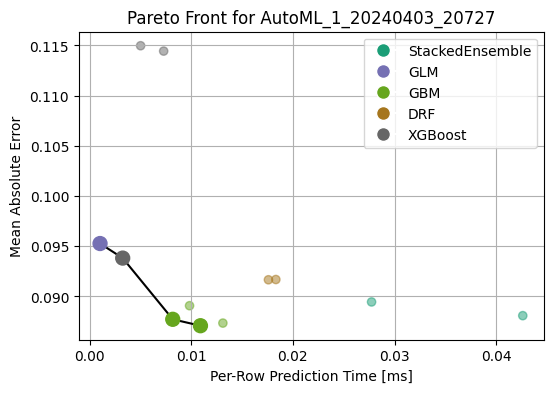

In [120]:
pf = aml.pareto_front()
fig = pf.figure()

# Adjust the size of the figure
fig.set_size_inches(6, 4)

# Display the plot
pf

In [121]:
best_model = aml.leader
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20240403_20727


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    21                 21                          16674                  7            7            7             44            79            58.4762

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.032042816994376264
RMSE: 0.17900507533133317
MAE: 0.07415201049316664
RMSLE: 0.12161820797236848
Mean Residual Deviance: 0.032042816994376264

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.04444820779638162
RMSE: 0.2108274360617745
MAE: 0.08707925545004798
RMSLE: 0.148091916133227
Mean Residual Deviance: 0.0444

In [122]:
print("Best Model ID:", best_model.model_id)
print("Best Model MSE:", best_model.mse())

Best Model ID: GBM_2_AutoML_1_20240403_20727
Best Model MSE: 0.032042816994376264


In [123]:
best_model.algo

'gbm'

### Train the best model

In [124]:
best_model.train(x=X,y=y_target,training_frame=df_train)

gbm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1712110024330_13


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          16073                  5            5            5             7             30            20.88

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.03181848417387551
RMSE: 0.17837736452217112
MAE: 0.07255001393392245
RMSLE: 0.12220448192456684
Mean Residual Deviance: 0.03181848417387551

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  --------------------
     2024-04-03 02:08:37  0.024 sec   0.0                0.21832548550176137  0.09533203523917458  0.04766601761957981
     2024-04-03 02:08:37  0.042 sec   1.0                0.21481425360386747  0.09373113678408578  0.04614516355138669
     2024-04-03 02:08:37  0.063 sec   2.0                0.21199911544736366  0.09234609351771784  0.044943624950464625
     2024-04-03 02:08:37  0.089 sec   3.0                0.20951091137635455  0.09108241419565634  0.0438948219857507
     2024-04-03 02:08:37  0.111 sec   4.0                0.20733337535153734  0.08989773673105064  0.042987128534661474
     2024-04-03 02:08:37  0.130 sec   5.0                0.20532907075879295  0.0887534748313795   0.042160027298669404
     2024-04-03 02:08:37  0.155 sec   6.0                0.2035868872876532   0.08771994913003761  0.04144762067547561
     2024-04-03 02:08:37  0.166 sec   7.0                0.20200600232136937  0.08675467929496976  0.04080642497386109
     2024-04-03 02:08:37  0.192 sec   8.0                0.20076814489414319  0.08596261970533876  0.04030784800423567
     2024-04-03 02:08:37  0.204 sec   9.0                0.1992611975051839   0.08504280165149423  0.039705024831199906
---  ---                  ---         ---                ---                  ---                  ---
     2024-04-03 02:08:37  0.762 sec   41.0               0.18040754263217776  0.07343246757025919  0.03254688143858103
     2024-04-03 02:08:37  0.783 sec   42.0               0.17995922141378032  0.07321096345248657  0.03238532137185401
     2024-04-03 02:08:37  0.807 sec   43.0               0.17985372451327558  0.07317251737337419  0.03234736222129722
     2024-04-03 02:08:37  0.824 sec   44.0               0.17972913962828382  0.07309716601396826  0.03230256363152314
     2024-04-03 02:08:37  0.850 sec   45.0               0.1796407859858886   0.07308827315006539  0.03227081198962783
     2024-04-03 02:08:37  0.863 sec   46.0               0.17934665624521293  0.07294327557432763  0.03216522310633858
     2024-04-03 02:08:37  0.878 sec   47.0               0.17931737807448803  0.07294635970281425  0.03215472207950888
     2024-04-03 02:08:37  0.899 sec   48.0               0.17893822757808625  0.07277116751009186  0.03201888928878699
     2024-04-03 02:08:37  0.918 sec   49.0               0.17882438959454944  0.07273112955164167  0.0319781623138632
     2024-04-03 02:08:37  0.938 sec   50.0               0.17837736452217112  0.07255001393392245  0.03181848417387551
[51 rows x 7 columns]


Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
age                119.034                1                    0.350658
avg_glucose_level  78.9015                0.66285              0.232433
bmi                71.8383                0.603512             0.211626
smoking_status     19.585        

In [125]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [126]:
target_column = "stroke"

# Add the actual labels to the predictions DataFrame
predictions[target_column] = df_test[target_column]

# Evaluate model performance
perf = best_model.model_performance(df_test)

In [127]:
print(perf)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.03895535632464439
RMSE: 0.19737111319705422
MAE: 0.07893306715836494
RMSLE: 0.14045415966177632
Mean Residual Deviance: 0.03895535632464439


## Regularization

In [128]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

#without regularization
house_glm = H2OGeneralizedLinearEstimator(family = 'binomial', lambda_ = 0, compute_p_values = True)

In [129]:
# With regularization

house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'binomial', lambda_ = .001, alpha = 0.5)

### With Regularization
- 0 = L1 regularization (Ridge)
- 1 = L2 regularization (Lasso)
- between 0 and 1 = combination of L1 and L2 regularization (Elastic Net)

In [130]:
house_glm_regularization.train(x = X, y = y_target, training_frame = df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712110024330_14


GLM Model: summary
    family    link    regularization                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.001 )  10                            9                              5                       py_235_sid_8f14

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.042902624602100994
RMSE: 0.20712948752435273
LogLoss: 0.15871888885233743
AUC: 0.843979640548268
AUCPR: 0.21564996561408883
Gini: 0.687959281096536
Null degrees of freedom: 4064
Residual degrees of freedom: 4055
Null deviance: 1618.3426770720644
Residual deviance: 1290.3845663695035
AIC: 1310.3845663695035

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13887011311968717
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      3500  361  0.0935   (361.0/3861.0)
1      103   101  0.5049   (103.0/204.0)
Total  3603  462  0.1141   (464.0/4065.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.13887      0.303303  151
max f2                       0.0713444    0.43628   233
max f0point5                 0.180399     0.264798  108
max accuracy                 0.450101     0.950308  1
max precision                0.510437     1         0
max recall                   0.00128763   1         398
max specificity              0.510437     1         0
max absolute_mcc             0.0713444    0.283509  233
max min_per_class_accuracy   0.0614689    0.768454  247
max mean_per_class_accuracy  0.0589443    0.774302  252
max tns                      0.510437     3861      0
max fns                      0.510437     203       0
max fps                      0.0011152    3861      399
max tps                      0.00128763   204       398
max tnr                      0.510437     1         0
max fnr                      0.510437     0.995098  0
max fpr                      0.0011152    1         399
max tpr                      0.00128763   1         398

Gains/Lift Table: Avg response rate:  5.02 %, avg score:  5.02 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100861                   0.309051           6.80416    6.80416            0.341463         0.355212    0.341463                    0.355212            0.0686275       0.0686275                  580.416   580.416            0.0616344
2        0.0201722                   0.268454           5.34613    6.07514            0.268293         0.286561    0.304878                    0.320887            0.0539216       0.122549                   434.613   507.514            0.107786
3        0.0300123                   0.237902           2.49081    4.89995            0.125            0.252844    0.245902                    0.298578            0.0245098       0.147059                   149.081   389.995            0.123231
4        0.0400984                   0.215008           4.3741     4.76768            0.219512         0.226116    0.239264                    0.280351            0.0441176       0.191176                   337.41  

#### Elastic Net:
- Accuracy = 1 - training_classification error = 1 - 0.1403 = 0.8597(approx)

## Without Regularization

In [131]:
#Model details without regularization
house_glm.train(x = X, y = y_target, training_frame = df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1712110024330_16


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              10                            10                             6                       py_235_sid_8f14

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.04289026379119593
RMSE: 0.20709964700886366
LogLoss: 0.15864007314677597
AUC: 0.8439364738384346
AUCPR: 0.21777075132408083
Gini: 0.6878729476768692
Null degrees of freedom: 4064
Residual degrees of freedom: 4054
Null deviance: 1618.3426770720644
Residual deviance: 1289.743794683288
AIC: 1311.743794683288

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14436506979280236
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      3519  342  0.0886   (342.0/3861.0)
1      106   98   0.5196   (106.0/204.0)
Total  3625  440  0.1102   (448.0/4065.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.144365     0.304348  152
max f2                       0.0706569    0.435159  240
max f0point5                 0.197888     0.264337  103
max accuracy                 0.45362      0.950308  1
max precision                0.535978     1         0
max recall                   0.00108139   1         398
max specificity              0.535978     1         0
max absolute_mcc             0.109875     0.286337  191
max min_per_class_accuracy   0.0597718    0.764706  255
max mean_per_class_accuracy  0.0469422    0.776418  276
max tns                      0.535978     3861      0
max fns                      0.535978     203       0
max fps                      0.000935434  3861      399
max tps                      0.00108139   204       398
max tnr                      0.535978     1         0
max fnr                      0.535978     0.995098  0
max fpr                      0.000935434  1         399
max tpr                      0.00108139   1         398

Gains/Lift Table: Avg response rate:  5.02 %, avg score: 29.03 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100861                   0.50222            0         0                  0                0.533994  0                           0.533994            0               0                          -100      -100               -0.010619
2        0.0201722                   0.493019           0         0                  0                0.496772  0                           0.515383            0               0                          -100      -100               -0.021238
3        0.0300123                   0.488165           0         0                  0                0.490712  0                           0.507294            0               0                          -100      -100               -0.031598
4        0.0400984                   0.484537           0         0                  0                0.486585  0                           0.502085            0               0                          -100      -100               -0.042217
5        0.0501845                   0.479703           0       

#### Accuracy(Without Regularization):
-  1 - Training Classification Error Accuracy = 1 - 0.1354 Accuracy ≈ 0.8646

## Interpretation of AutoML

In [132]:
import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse        mse        mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  ---------  --------  ------------------------  ------------------  -------------------------  ---------------
GBM_1_AutoML_1_20240403_20727                           0.194753  0.0379289  0.0803853  0.136998                 0.0379289                 625                   0.011444  GBM
StackedEnsemble_AllModels_1_AutoML_1_20240403_20727     0.194905  0.037988   0.0809338  0.1372                   0.037988                 1298                   0.064588  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240403_20727  0.195886  0.0383715  0.0822828  0.137747                 0.0383715                2243                   0.068829  StackedEnsemble
GLM_1_AutoML_1_20240403_20727                           0.196828  0.0387414  0.0881346  0.13881                  0.0387414                  48                   0.005317  GLM
GBM_2_AutoML_1_20240403_20727                           0.198055  0.0392257  0.0796083  0.140245                 0.0392257                 500                   0.019015  GBM
GBM_3_AutoML_1_20240403_20727                           0.198945  0.0395792  0.0810803  0.141203                 0.0395792                 307                   0.015224  GBM
GBM_4_AutoML_1_20240403_20727                           0.19996   0.0399839  0.0823491  0.141867                 0.0399839                 340                   0.027564  GBM
XRT_1_AutoML_1_20240403_20727                           0.199975  0.0399901  0.0864826  0.142085                 0.0399901                1360                   0.033991  DRF
XGBoost_3_AutoML_1_20240403_20727                       0.207665  0.0431249  0.0891866  0.150725                 0.0431249                 492                   0.014022  XGBoost
DRF_1_AutoML_1_20240403_20727                           0.209031  0.043694   0.0870208  0.151646                 0.043694                 1078                   0.047134  DRF
XGBoost_2_AutoML_1_20240403_20727                       0.219022  0.0479708  0.102047   0.161545                 0.0479708                1476                   0.006899  XGBoost
XGBoost_1_AutoML_1_20240403_20727                       0.224594  0.0504423  0.109122   0.167713                 0.0504423                1365                   0.013912  XGBoost
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

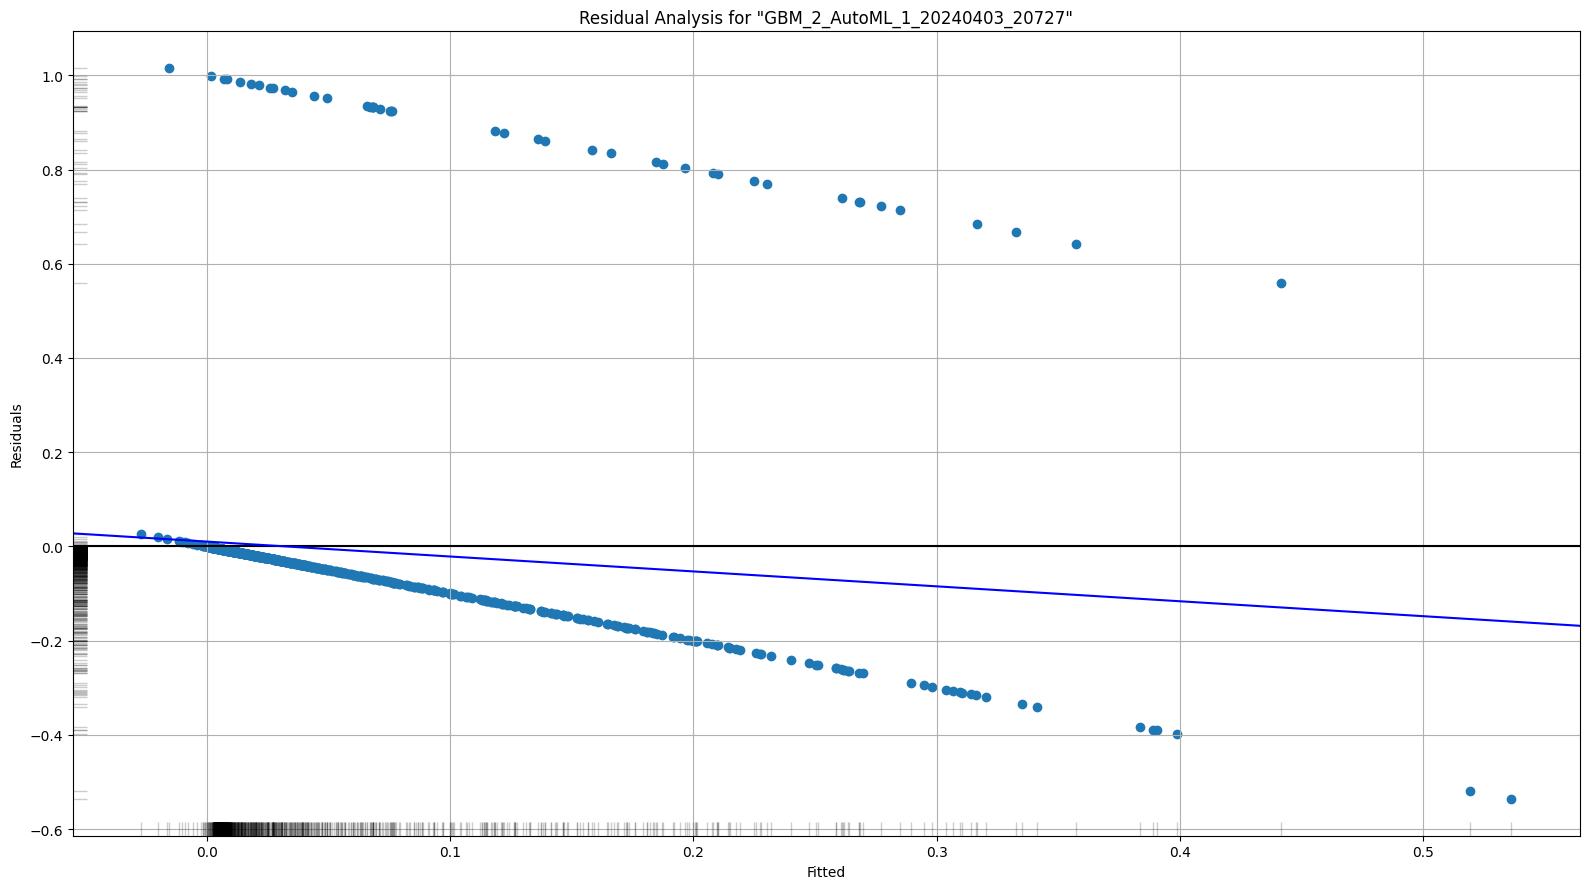

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

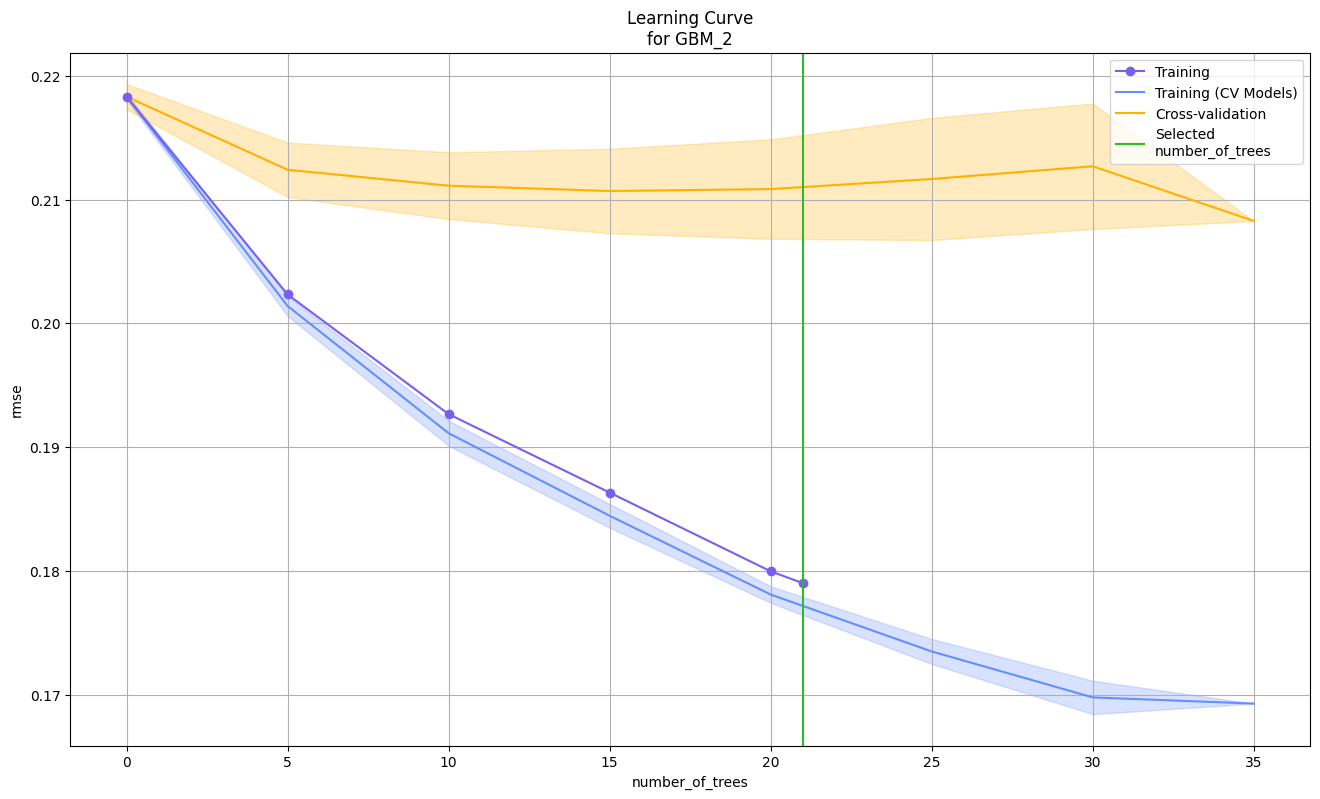

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

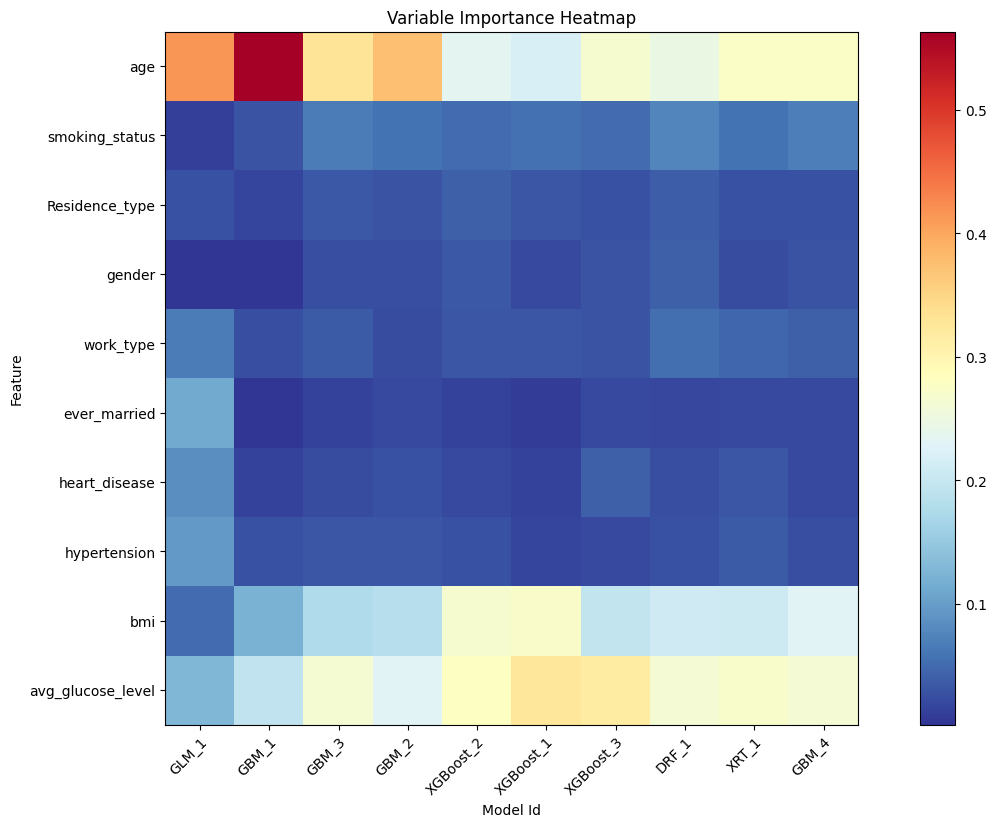

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

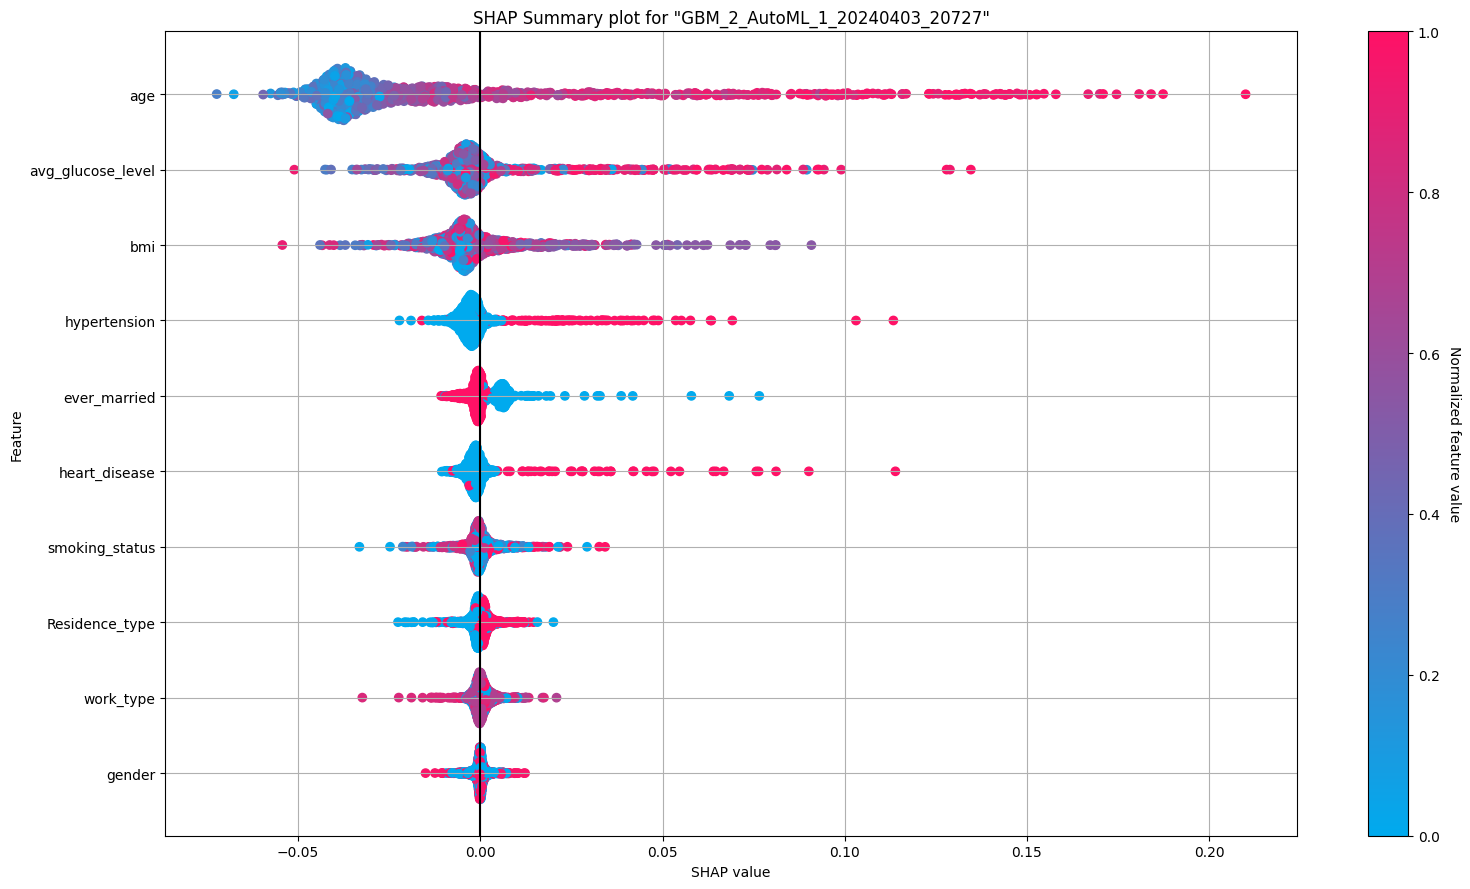

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

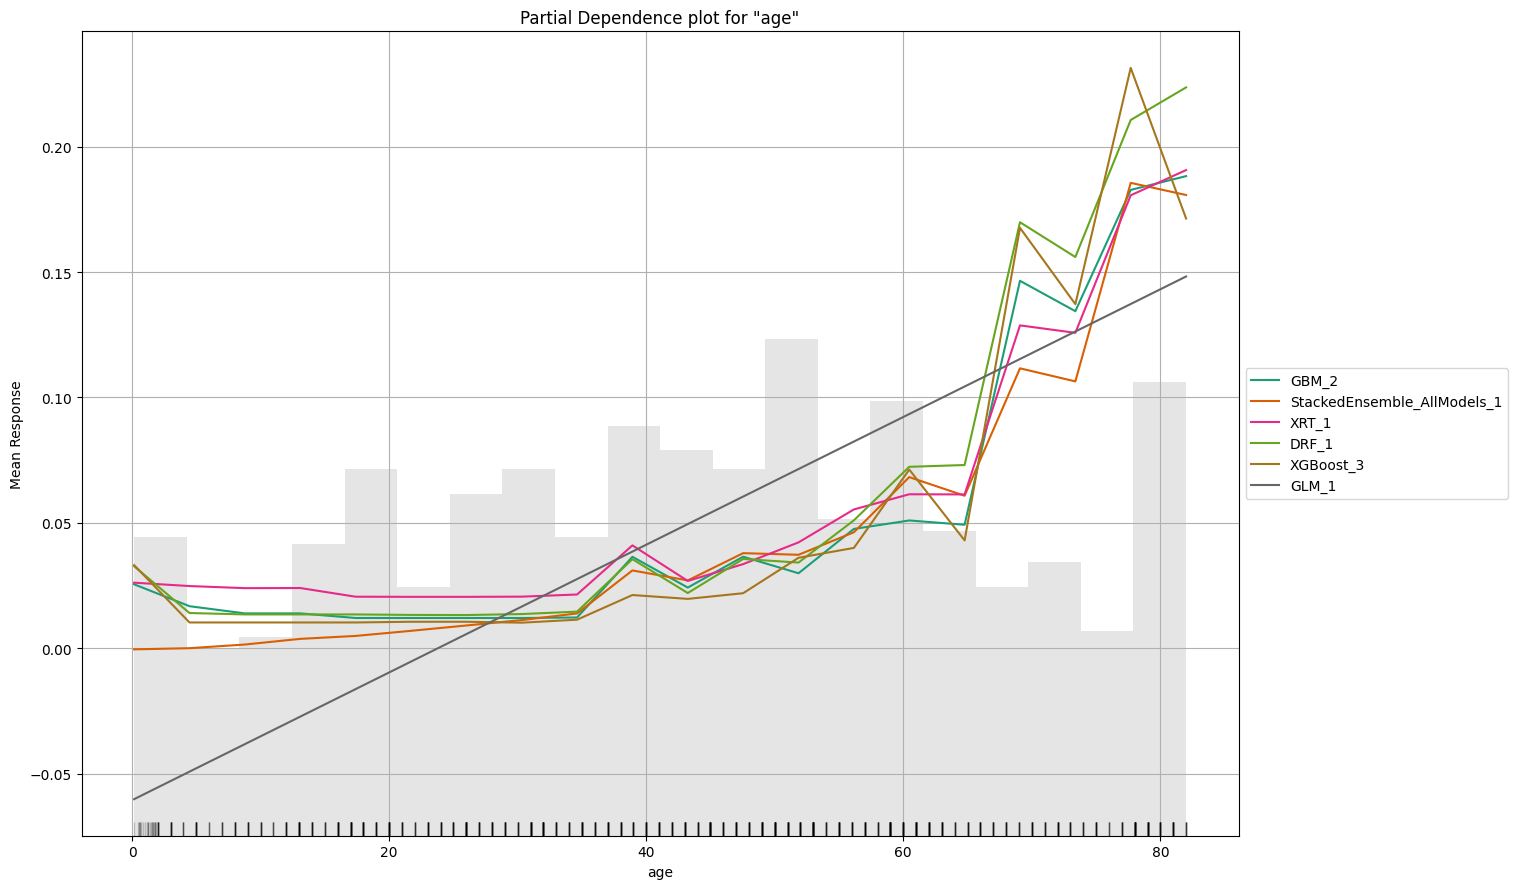

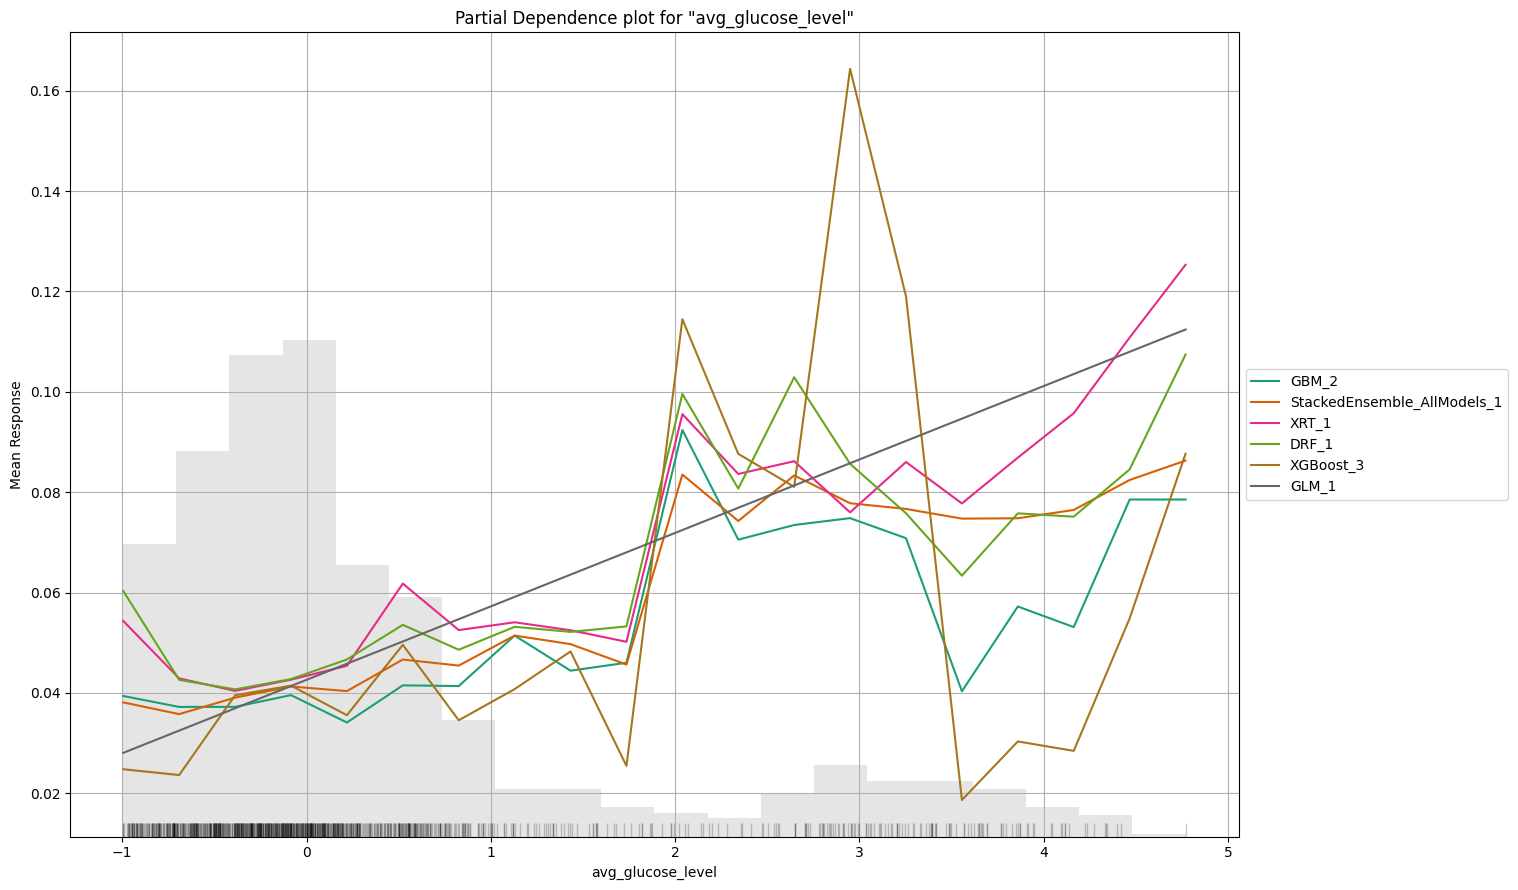

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

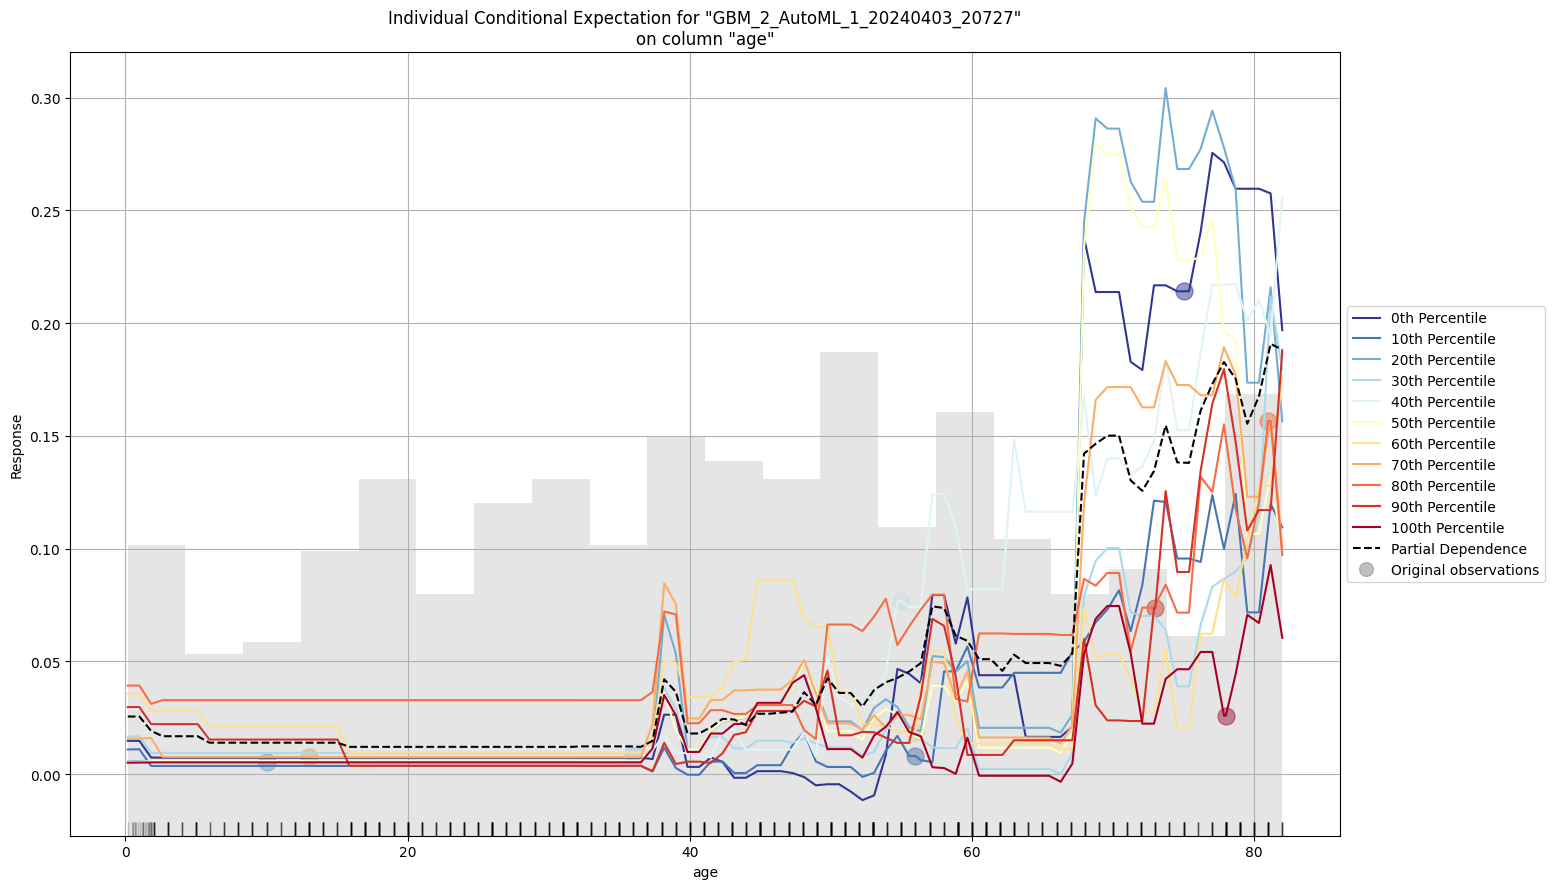

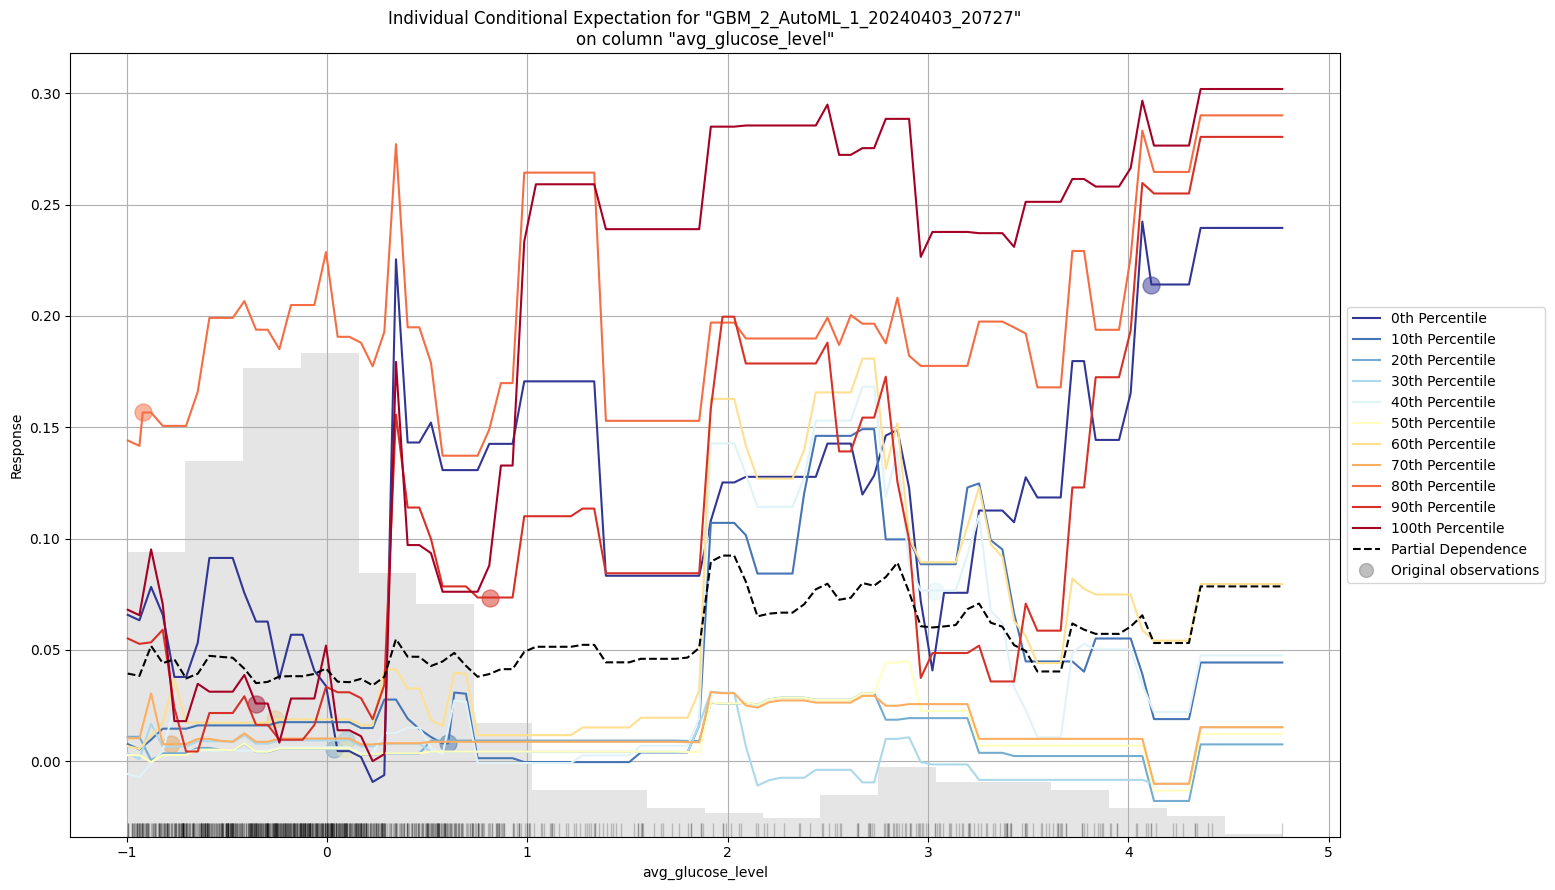

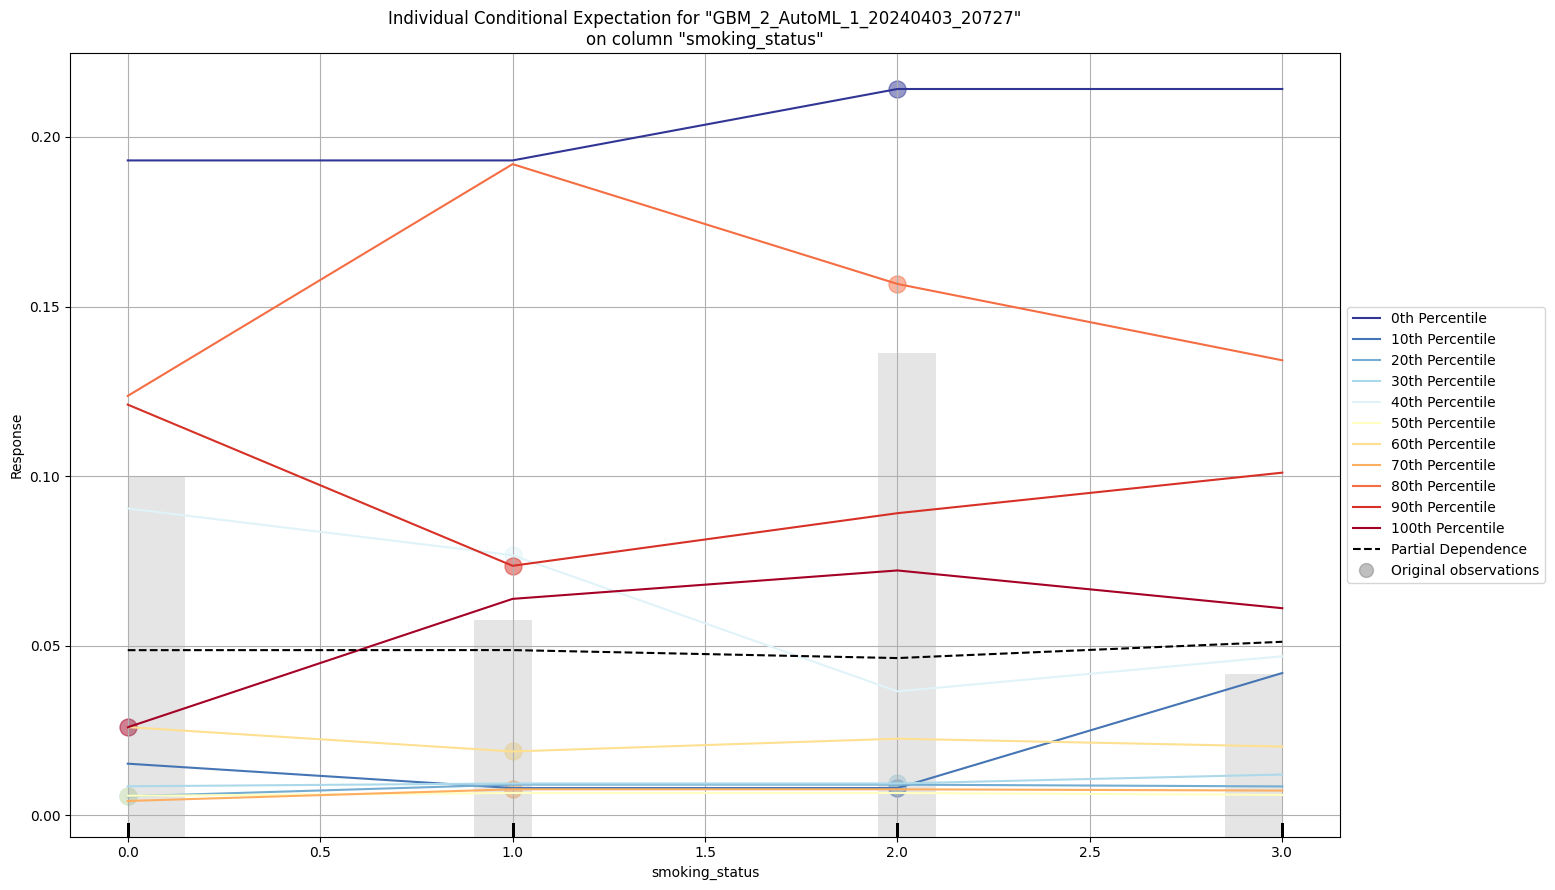

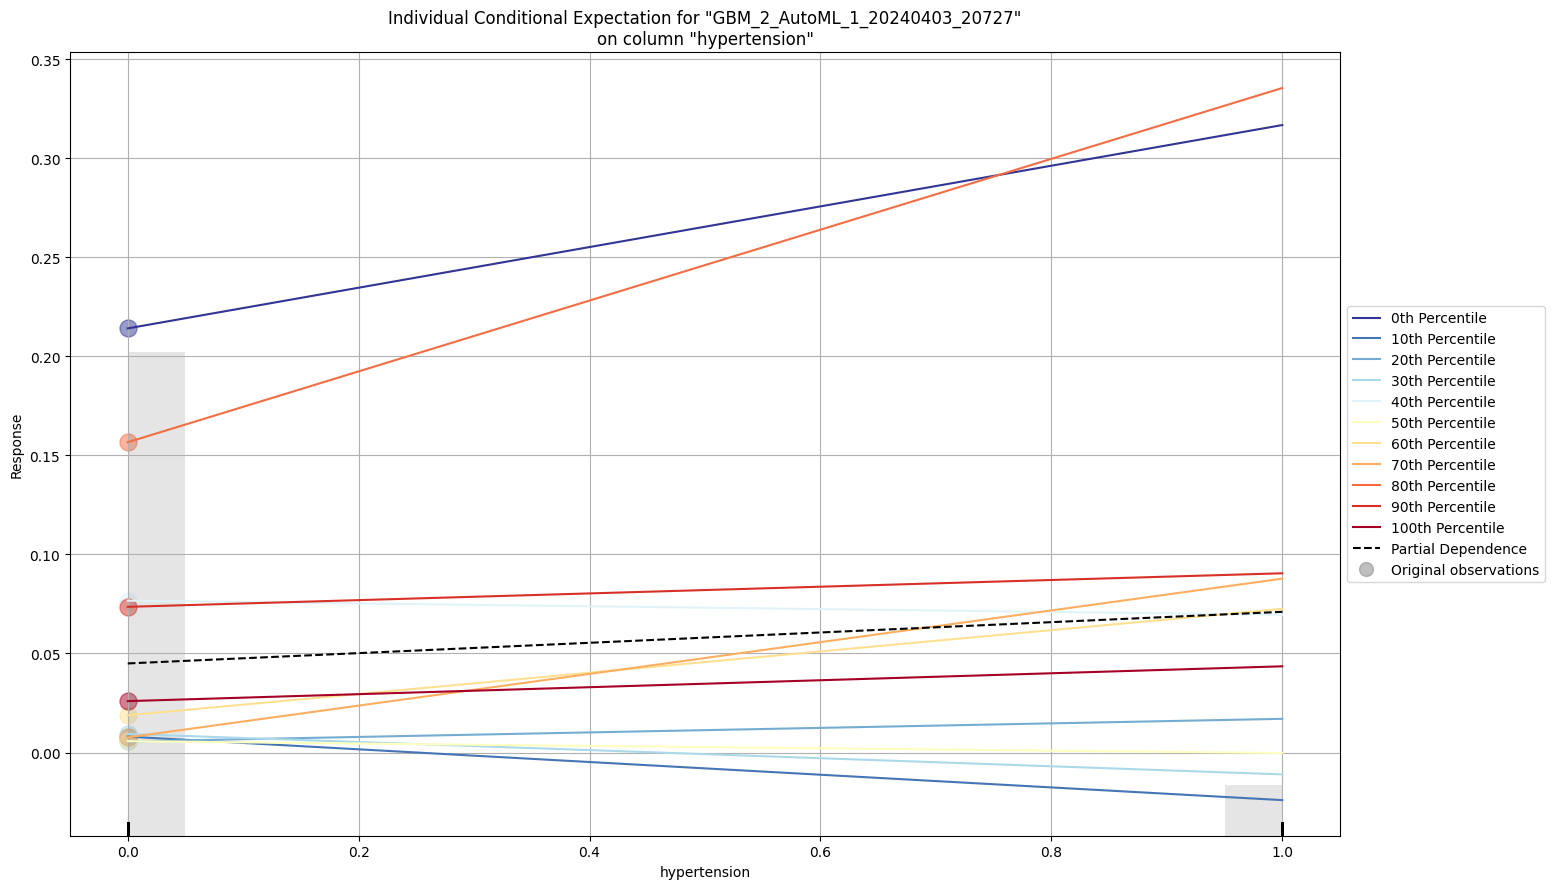

In [133]:
explain_model = aml.explain(frame = df_test)

## CONCLUSION
- Linear Regression: The features 'age', 'ever_married', and 'bmi' appear to be the most important, with 'age' having the largest impact. The SHAP values indicate varying levels of impact across the values of each feature.

- XGBoost: Similar to the linear regression model, 'age', 'bmi', and 'avg_glucose_level' are significant, but there's a noticeable difference in the distribution of SHAP values. 'Age' and 'bmi' have a broad spread of SHAP values, suggesting a non-linear and complex relationship with the outcome.

- AutoML: The AutoML plot suggests a more even distribution of feature importance across many features, with 'age' still being prominent but less dominant. This model may be picking up more on the nuanced interactions between features.

1. Overall, 'age' is consistently important across all three models, suggesting it is a strong predictor of the outcome. The XGBoost and AutoML models, which likely capture non-linear relationships and interactions between features, show a broader spread of influence across additional features compared to the linear regression model.


2. After performing Regularization(Elastic Net), it is observed that Regularization does not help. That is accuracy after regularization is 0.8597, and running model before regularization is 0.8646.

3. Hyperparamters -

a) H2OAutoML Hyperparameters for Model Training:
- max_runtime_secs: Maximum time (in seconds) that the AutoML process is allowed to run. After this time limit is reached, the AutoML process will stop and return the best model found up to that point.
- sort_metric: The metric used for sorting and selecting the best models. In this case, 'MAE' (Mean Absolute Error) is specified. This is the metric used to evaluate and compare model performance during the AutoML process.
- max_models: The maximum number of models to build during the AutoML process. Once this limit is reached, the process stops.
- seed: Seed for reproducibility. Setting a seed ensures that the random processes involved in model building are the same across different runs, making the results reproducible.
- exclude_algos: A list of algorithms to exclude from the AutoML process. In this case, 'DeepLearning' is excluded, meaning that deep learning models will not be considered during AutoML.

b)H2OGeneralizedLinearEstimator Hyperparameters for Regularization:
- family: Specifies the type of distribution for the response variable. In this case, it is set to 'binomial' since you are dealing with a binary classification problem (0 or 1 outcomes).
- lambda_: The regularization strength, also known as the lambda parameter. It controls the amount of regularization applied to the model. Smaller values of lambda result in stronger regularization, helping prevent overfitting.
- alpha: The elastic net mixing parameter, which controls the balance between L1 (Lasso) and L2 (Ridge) regularization. When alpha is 0, it corresponds to L2 regularization only. When alpha is 1, it corresponds to L1 regularization only. Values between 0 and 1 provide a mix of both.

## Answers to the Questions


1. <u>**What is the question?**</u>

My dataset is of Heart Stroke Prediction which is a binary classification task.. Therefore, my goal is to construct various machine learning models, specifically linear models, tree based models, and AutoML to predict the target variable that is stroke(binary - 0/1. This is done by reading the data, feature selection, preprocessing it using label encoding, handling missing values, and normalization, performing Exploratory Data Analysis and then comes the modeling part followed by SHAP analysis.


2. <u>**What did you do?**</u>

For the initial step, data is loaded dynamically through a file uploaded on github. The next step is preprocessing the data by dropping uneccesary column, imputing null values from bmi column with median, and performing label encoding on categorical features, and then followed by Exploratory Data Analysis creating visualizations that help in understanding the data. The next step is feature selection using OLS regression, and Random Forest Classification which is then followed by Normalization using Robust Scaler, and handling outliers. Then comes the modeling part where specifically 3 models are used - Logistic Regression (Linear Model), XGBoost (Tree based model), and AutoML. Then all the models are compared with the help of SHAP analysis.


3. <u>**How well did it work?**</u>

For the model to perform better, I fitted 3 models which are Logistic Regression giving accuracy 95.968%, XGBoost Model giving accuracy 96%, and AutoML where GBM is the best model of all the other models in AutoML. Additionally, removing outliers from avg_glucose_level helped the model to perform better enhancing the accuracy by 1.067. Moreover, regularization was used to see whether it helps for overfitting, but it is concluded from the metrics of models that the model without regularization works better as compared to the models with regularization.


4. <u>**What did you learn?**</u>

I learned how to -
- Prepare and preprocess data: This involved loading the Heart Stroke Prediction dataset, handling missing values, label encoding categorical features, and conducting exploratory data analysis (EDA) to gain insights into the data.

- Select relevant features: I used techniques such as Ordinary Least Squares (OLS) regression and Random Forest Classification for feature selection to identify important predictors for stroke prediction.

- Apply various machine learning models: Specifically, I fitted logistic regression (a linear model), XGBoost (a tree-based model), and utilized AutoML, including Gradient Boosting Machines (GBM), to predict stroke outcomes.

- Evaluate model performance: I assessed model performance using metrics such as accuracy and employed interpretability techniques like SHAP analysis to compare and understand model predictions.

- Performance improvement techniques: I experimented with outlier removal and regularization to enhance model accuracy. Outlier removal positively impacted accuracy, while regularization did not significantly affect model performance.


### REFERENCES
- Geeks for Geeks: https://www.geeksforgeeks.org/understanding-logistic-regression/

- XGBoost Documentation: https://xgboost.readthedocs.io/en/stable/

- H2O Documentation: : https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html?_ga=2.129161676.1179250264.1708398551-1770022984.1708209167

- Towards Data Science(SHAP Analysis): https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

- SHAP Documentation: https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

## LICENSE

MIT License

Copyright (c) 2024 pranitee23

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.